In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import urllib.request
import os
import seaborn as sns
from IPython.display import display
sns.set_style('darkgrid')

In [3]:
stack_raw_df = pd.read_csv('/Users/parastooagharezaei/Downloads/developer_survey_2020/survey_results_public.csv')

In [4]:
stack_raw_df

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

         CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0       European Euro  ...  Neither easy nor difficult  Appropriate in length   
1      Pound sterling  ...                         NaN                    NaN   
2                 NaN  ...  Neither easy nor difficult  Appropriate in length   
3        Albanian lek  ...                         NaN                    NaN   
4                 NaN  ...                        Easy              Too short   
...               ...  ...                         ...                    ...   
64456             NaN  ...                         NaN                    NaN   
64457             NaN  ...                         NaN                    NaN   
64458             NaN  ...                         NaN                    NaN   
64459             NaN  ...                         NaN                    NaN   
64460             NaN  ...                         NaN                    NaN   

      Trans                                     UndergradMajor  \
0        No  Computer science, computer engineering, or sof...   
1       NaN  Computer science, computer engineering, or sof...   
2       NaN                                                NaN   
3        No  Computer science, computer engineering, or sof...   
4        No  Computer science, computer engineering, or sof...   
...     ...                                                ...   
64456   NaN  Computer science, computer engineering, or sof...   
64457   NaN                                                NaN   
64458   NaN                                                NaN   
64459   NaN                                                NaN   
64460   NaN  Computer science, computer engineering, or sof...   

            WebframeDesireNextYear                      WebframeWorkedWith  \
0                     ASP.NET Core                    ASP.NET;ASP.NET Core   
1                              NaN                                     NaN   
2                              NaN                           

In [5]:
stack_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
raw_schema_df = pd.read_csv('/Users/parastooagharezaei/Downloads/developer_survey_2020/survey_results_schema.csv')
raw_schema_df

Column                                       QuestionText
0           Respondent  Randomized respondent ID number (not in order ...
1           MainBranch  Which of the following options best describes ...
2             Hobbyist                            Do you code as a hobby?
3                  Age  What is your age (in years)? If you prefer not...
4           Age1stCode  At what age did you write your first line of c...
..                 ...                                                ...
56  WebframeWorkedWith  Which web frameworks have you done extensive d...
57       WelcomeChange  Compared to last year, how welcome do you feel...
58         WorkWeekHrs  On average, how many hours per week do you wor...
59           YearsCode  Including any education, how many years have y...
60        YearsCodePro  NOT including education, how many years have y...

[61 rows x 2 columns]

In [7]:
raw_schema_df = raw_schema_df.set_index('Column')
raw_schema_df.QuestionText
raw_schema_df

QuestionText
Column                                                               
Respondent          Randomized respondent ID number (not in order ...
MainBranch          Which of the following options best describes ...
Hobbyist                                      Do you code as a hobby?
Age                 What is your age (in years)? If you prefer not...
Age1stCode          At what age did you write your first line of c...
...                                                               ...
WebframeWorkedWith  Which web frameworks have you done extensive d...
WelcomeChange       Compared to last year, how welcome do you feel...
WorkWeekHrs         On average, how many hours per week do you wor...
YearsCode           Including any education, how many years have y...
YearsCodePro        NOT including education, how many years have y...

[61 rows x 1 columns]

In [8]:
#with pd.option_context('display.max_rows',100):
    #display(schema_df)

In [9]:
#pd.set_option('display.max_colwidth', None)
#with pd.option_context('display.max_rows',100):
    #display(schema_df)

In [10]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [11]:
stack_df = stack_raw_df[selected_columns].copy()

In [12]:
stack_df

Country   Age Gender  \
0                 Germany   NaN    Man   
1          United Kingdom   NaN    NaN   
2      Russian Federation   NaN    NaN   
3                 Albania  25.0    Man   
4           United States  31.0    Man   
...                   ...   ...    ...   
64456       United States   NaN    NaN   
64457             Morocco   NaN    NaN   
64458            Viet Nam   NaN    NaN   
64459              Poland   NaN    NaN   
64460               Spain   NaN    NaN   

                                               EdLevel  \
0      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                                  NaN   
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
64456  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64457                                              NaN   
64458                        Primary/elementary school   
64459                                              NaN   
64460       Other doctoral degree (Ph.D., Ed.D., etc.)   

                                          UndergradMajor Hobbyist Age1stCode  \
0      Computer science, computer engineering, or sof...      Yes         13   
1      Computer science, computer engineering, or sof...       No         19   
2                                                    NaN      Yes         15   
3      Computer science, computer engineering, or sof...      Yes         18   
4      Computer science, computer engineering, or sof...      Yes         16   
...                                                  ...      ...        ...   
64456  Computer science, computer engineering, or sof...      Yes         16   
64457                                                NaN      Yes        NaN   
64458                                                NaN      Yes        NaN   
64459                                                NaN      Yes        NaN   
64460  Computer science, computer engineering, or sof...      Yes        NaN   

      YearsCode      YearsCodePro  \
0            36                27   
1             7                 4   
2             4               NaN   
3             7                 4   
4            15                 8   
...         ...               ...   
64456        10  Less than 1 year   
64457       NaN               NaN   
64458       NaN               NaN   
64459       NaN               NaN   
64460       NaN               NaN   

                                      LanguageWorkedWith  \
0                                 C#;HTML/CSS;JavaScript   
1                                       JavaScript;Swift   
2                               Objective-C;Python;Swift   
3                                                    NaN   
4                                      HTML/CSS;Ruby;SQL   
...                                                  ...   
64456                                                NaN   
64457  Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...   
64458                                                NaN   
64459                                           HTML/CSS   
64460                    C#;HTML/CSS;Java;JavaScript;SQL   

                                  LanguageDesireNextYear       NEWLearn  \
0                                 C#;HTML/CSS;JavaScript    Once a year   
1                                           Python;Swift    Once a year   
2                               Objective-C;Python;Swift  Once a decade   
3                                                    NaN    Once a year   
4                                        Java;Ruby;Scala    Once a year   
...                                                  ...            ...   
64456                                                NaN  Once a decade   
64457  Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...            NaN   
64458         

In [13]:
stack_df.describe()

Age   WorkWeekHrs
count  45446.000000  41151.000000
mean      30.834111     40.782174
std        9.585392     17.816383
min        1.000000      1.000000
25%       24.000000     40.000000
50%       29.000000     40.000000
75%       35.000000     44.000000
max      279.000000    475.000000

In [14]:
stack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
stack_df['Age1stCode'] = pd.to_numeric(stack_df.Age1stCode,errors='coerce')
stack_df['YearsCode'] = pd.to_numeric(stack_df.YearsCode,errors='coerce')
stack_df['YearsCodePro'] = pd.to_numeric(stack_df.YearsCodePro,errors='coerce')

In [16]:
stack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [17]:
stack_df.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45446.000000  57473.000000  56784.000000  44133.000000  41151.000000
mean      30.834111     15.476572     12.782051      8.869667     40.782174
std        9.585392      5.114081      9.490657      7.759961     17.816383
min        1.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     44.000000
max      279.000000     85.000000     50.000000     50.000000    475.000000

In [18]:
stack_df = stack_df[stack_df.Age < 100]
stack_df = stack_df[stack_df.Age > 10]
stack_df.drop(stack_df[stack_df.WorkWeekHrs > 140].index,inplace= True)

In [19]:
stack_df.shape

(45314, 20)

In [20]:
pd.set_option('display.max_colwidth', None)
with pd.option_context('display.max_rows',5000):
    display(stack_df)

Country   Age Gender  \
3             Albania  25.0    Man   
4       United States  31.0    Man   
7       United States  36.0    Man   
8             Tunisia  30.0    Man   
9      United Kingdom  22.0    Man   
...               ...   ...    ...   
64426           Spain  22.0    Man   
64427          Brazil  34.0    Man   
64430          Israel  38.0    Man   
64433          France  64.0    Man   
64441          Canada  17.0    Man   

                                                                                  EdLevel  \
3                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
7                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
8                                                      Professional degree (JD, MD, etc.)   
9                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                                                   ...   
64426                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
64427                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64430                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64433                                                                                 NaN   
64441  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   

                                                              UndergradMajor  \
3            Computer science, computer engineering, or software engineering   
4            Computer science, computer engineering, or software engineering   
7            Computer science, computer engineering, or software engineering   
8            Computer science, computer engineering, or software engineering   
9                                                  Mathematics or statistics   
...                                                                      ...   
64426        Computer science, computer engineering, or software engineering   
64427        Computer science, computer engineering, or software engineering   
64430                                                                    NaN   
64433  Information systems, information technology, or system administration   
64441                                                                    NaN   

      Hobbyist  Age1stCode  YearsCode  YearsCodePro  \
3          Yes        18.0        7.0           4.0   
4          Yes        16.0       15.0           8.0   
7          Yes        12.0       17.0          13.0   
8           No        20.0        6.0           4.0   
9          Yes        14.0        8.0           4.0   
...        ...         ...        ...           ...   
64426      Yes        10.0       10.0           NaN   
64427      Yes        18.0       16.0          14.0   
64430      Yes        35.0        3.0           NaN   
64433      Yes        18.0       30.0           NaN   
64441      Yes        10.0        7.0           NaN   

                                                          LanguageWorkedWith  \
3                                                                        NaN   
4                                                          HTML/CSS;Ruby;SQL   
7                                                                 Python;SQL   
8                                                    HTML/CSS;JavaScript;PHP   
9                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
64426  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
64427                                                             Python;SQL   
64430                                             HTML/CSS;JavaScript;Python   
64433          Bas

In [21]:
stack_df.Gender.value_counts()

Man                                                            40818
Woman                                                           3312
Non-binary, genderqueer, or gender non-conforming                333
Man;Non-binary, genderqueer, or gender non-conforming            108
Woman;Non-binary, genderqueer, or gender non-conforming           83
Woman;Man                                                         45
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

In [22]:
stack_df.Gender.value_counts()

Man                                                            40818
Woman                                                           3312
Non-binary, genderqueer, or gender non-conforming                333
Man;Non-binary, genderqueer, or gender non-conforming            108
Woman;Non-binary, genderqueer, or gender non-conforming           83
Woman;Man                                                         45
Woman;Man;Non-binary, genderqueer, or gender non-conforming       14
Name: Gender, dtype: int64

In [23]:
stack_df.where(~(stack_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [24]:
np.nan

nan

In [25]:
stack_df.Gender.value_counts()

Man                                                  40818
Woman                                                 3312
Non-binary, genderqueer, or gender non-conforming      333
Name: Gender, dtype: int64

In [26]:
highest_part_countries_df = stack_df.Country.value_counts().head(10)
highest_part_countries_df

United States     9525
India             4387
Germany           3064
United Kingdom    3011
Canada            1642
France            1457
Brazil            1368
Netherlands       1069
Poland             990
Australia          940
Name: Country, dtype: int64

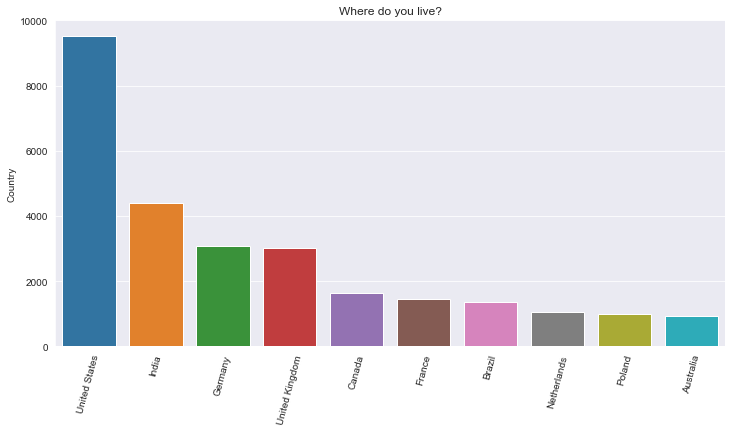

In [27]:
#plt.title(schema_df.loc['Country'].QuestionText);
plt.figure(figsize=(12,6));
plt.xticks(rotation=75);
sns.barplot(y=highest_part_countries_df,x=highest_part_countries_df.index);
plt.title(raw_schema_df.loc['Country'].QuestionText);

In [28]:
languages_df = pd.read_csv('/Users/parastooagharezaei/Desktop/University Stuff/Python/countries-languages.csv')
languages_df['Languages_spoken'] = languages_df['Languages Spoken']
languages_df.drop(columns='Languages Spoken',inplace=True)
languages_df

Country  \
0                        Afghanistan   
1                            Albania   
2                            Algeria   
3                            Andorra   
4                             Angola   
..                               ...   
193                          Vietnam   
194  Western Sahara (proposed state)   
195                            Yemen   
196                           Zambia   
197                         Zimbabwe   

                                                                                                                                                       Languages_spoken  
0                                                                                                Dari Persian, Pashtu (both official), other Turkic and minor languages  
1                                                                                                                        Albanian (Tosk is the official dialect), Greek  
2                                                                                                                            Arabic (official), French, Berber dialects  
3                                                                                                                     Catalán (official), French, Castilian, Portuguese  
4                                                                                                              Portuguese (official), Bantu and other African languages  
..                                                                                                                                                                  ...  
193  Vietnamese (official); English (increasingly favored as a second language); some French, Chinese, Khmer; mountain area languages (Mon-Khmer and Malayo-Polynesian)  
194                                                                                                                                   Hassaniya Arabic, Moroccan Arabic  
195                                                                                                                                                              Arabic  
196                                       English (official); major vernaculars: Bemba, Kaonda, Lozi, Lunda, Luvale, Nyanja, Tonga; about 70 other indigenous languages  
197                                                                                      English (official), Shona, Ndebele (Sindebele), numerous minor tribal dialects  

[198 rows x 2 columns]

In [29]:
import re
total_english_speaking_countries = list()
for i in range(len(languages_df)):
    country = languages_df.loc[i,'Country']
    language = languages_df.loc[i,'Languages_spoken']
    if re.search('English',language):
       total_english_speaking_countries.append(languages_df.loc[i,'Country'])
len(total_english_speaking_countries)

96

In [30]:
first_lang_english_countries = list()
for i in range(len(languages_df)):
    country = languages_df.loc[i,'Country']
    language = languages_df.loc[i,'Languages_spoken']
    if language.startswith('English'):
       first_lang_english_countries.append(languages_df.loc[i,'Country'])
len(first_lang_english_countries)

37

In [31]:
particip_in_each_country_df = stack_df.Country.value_counts()
particip_in_each_country_df.index

Index(['United States', 'India', 'Germany', 'United Kingdom', 'Canada',
       'France', 'Brazil', 'Netherlands', 'Poland', 'Australia',
       ...
       'Monaco', 'Timor-Leste', 'Libyan Arab Jamahiriya', 'Turkmenistan',
       'Papua New Guinea', 'Cape Verde', 'Saint Vincent and the Grenadines',
       'Eritrea', 'Nauru', 'Haiti'],
      dtype='object', length=171)

In [32]:
eng_lang_countries = list()
for i in particip_in_each_country_df.index:
    if i in total_english_speaking_countries:
        eng_lang_countries.append(i)
len(eng_lang_countries)
print(eng_lang_countries)

['United States', 'India', 'United Kingdom', 'Canada', 'Brazil', 'Australia', 'Israel', 'Pakistan', 'South Africa', 'Nigeria', 'Bangladesh', 'Denmark', 'Ireland', 'Greece', 'Argentina', 'New Zealand', 'Indonesia', 'Philippines', 'Sri Lanka', 'Kenya', 'Egypt', 'Singapore', 'Nepal', 'Malaysia', 'Thailand', 'United Arab Emirates', 'Ghana', 'Lebanon', 'Costa Rica', 'Uganda', 'Cyprus', 'Jordan', 'Iceland', 'Malta', 'Ethiopia', 'Nicaragua', 'Cameroon', 'Zimbabwe', 'Sudan', 'Rwanda', 'Panama', 'Honduras', 'Mauritius', 'Qatar', 'Cambodia', 'Jamaica', 'Kuwait', 'Zambia', 'Somalia', 'Botswana', 'Bahrain', 'Trinidad and Tobago', 'Oman', 'Maldives', 'Belize', 'Guyana', 'Swaziland', 'Barbados', 'Namibia', 'Solomon Islands', 'Bahamas', 'Sierra Leone', 'Gambia', 'Lesotho', 'Monaco', 'Papua New Guinea', 'Nauru']


In [33]:
stack_df['Index'] = range(len(stack_df))
stack_df.set_index('Index',inplace= True)

In [34]:
eng_particip_count = 0
for i in range(len(stack_df)):
    country_name = stack_df.loc[i,'Country']
    if country_name in eng_lang_countries:
       eng_particip_count = eng_particip_count +1

In [35]:
eng_percentage = (eng_particip_count /len(stack_df))*100
non_eng_percentage = 100- eng_percentage

In [36]:
eng_percentage

58.61985258419031

In [37]:
non_eng_percentage

41.38014741580969

In [38]:
for ind, row in stack_df.iterrows():
    if stack_df.loc[ind,'Country'] in eng_lang_countries:
        stack_df.loc[ind,'Language'] = 'English' 
    else:
        stack_df.loc[ind,'Language'] = 'Non-English' 
stack_df

Country   Age Gender  \
Index                                
0             Albania  25.0    Man   
1       United States  31.0    Man   
2       United States  36.0    Man   
3             Tunisia  30.0    Man   
4      United Kingdom  22.0    Man   
...               ...   ...    ...   
45309           Spain  22.0    Man   
45310          Brazil  34.0    Man   
45311          Israel  38.0    Man   
45312          France  64.0    Man   
45313          Canada  17.0    Man   

                                                                                  EdLevel  \
Index                                                                                       
0                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3                                                      Professional degree (JD, MD, etc.)   
4                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                                                   ...   
45309                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
45310                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45311                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45312                                                                                 NaN   
45313  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   

                                                              UndergradMajor  \
Index                                                                          
0            Computer science, computer engineering, or software engineering   
1            Computer science, computer engineering, or software engineering   
2            Computer science, computer engineering, or software engineering   
3            Computer science, computer engineering, or software engineering   
4                                                  Mathematics or statistics   
...                                                                      ...   
45309        Computer science, computer engineering, or software engineering   
45310        Computer science, computer engineering, or software engineering   
45311                                                                    NaN   
45312  Information systems, information technology, or system administration   
45313                                                                    NaN   

      Hobbyist  Age1stCode  YearsCode  YearsCodePro  \
Index                                                 
0          Yes        18.0        7.0           4.0   
1          Yes        16.0       15.0           8.0   
2          Yes        12.0       17.0          13.0   
3           No        20.0        6.0           4.0   
4          Yes        14.0        8.0           4.0   
...        ...         ...        ...           ...   
45309      Yes        10.0       10.0           NaN   
45310      Yes        18.0       16.0          14.0   
45311      Yes        35.0        3.0           NaN   
45312      Yes        18.0       30.0           NaN   
45313      Yes        10.0        7.0           NaN   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python

In [39]:
stack_df

Country   Age Gender  \
Index                                
0             Albania  25.0    Man   
1       United States  31.0    Man   
2       United States  36.0    Man   
3             Tunisia  30.0    Man   
4      United Kingdom  22.0    Man   
...               ...   ...    ...   
45309           Spain  22.0    Man   
45310          Brazil  34.0    Man   
45311          Israel  38.0    Man   
45312          France  64.0    Man   
45313          Canada  17.0    Man   

                                                                                  EdLevel  \
Index                                                                                       
0                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3                                                      Professional degree (JD, MD, etc.)   
4                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                                                   ...   
45309                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
45310                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45311                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45312                                                                                 NaN   
45313  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   

                                                              UndergradMajor  \
Index                                                                          
0            Computer science, computer engineering, or software engineering   
1            Computer science, computer engineering, or software engineering   
2            Computer science, computer engineering, or software engineering   
3            Computer science, computer engineering, or software engineering   
4                                                  Mathematics or statistics   
...                                                                      ...   
45309        Computer science, computer engineering, or software engineering   
45310        Computer science, computer engineering, or software engineering   
45311                                                                    NaN   
45312  Information systems, information technology, or system administration   
45313                                                                    NaN   

      Hobbyist  Age1stCode  YearsCode  YearsCodePro  \
Index                                                 
0          Yes        18.0        7.0           4.0   
1          Yes        16.0       15.0           8.0   
2          Yes        12.0       17.0          13.0   
3           No        20.0        6.0           4.0   
4          Yes        14.0        8.0           4.0   
...        ...         ...        ...           ...   
45309      Yes        10.0       10.0           NaN   
45310      Yes        18.0       16.0          14.0   
45311      Yes        35.0        3.0           NaN   
45312      Yes        18.0       30.0           NaN   
45313      Yes        10.0        7.0           NaN   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python

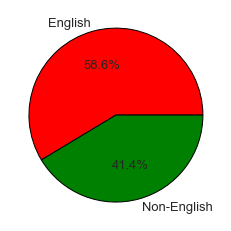

<Figure size 2500x2500 with 0 Axes>

In [40]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 13.0
language_counts = stack_df.Language.value_counts();
plt.pie(language_counts,labels= language_counts.index,colors=['red','green'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'});
plt.figure(figsize=(5,5),dpi=500);


In [41]:
for ind, row in stack_df.iterrows():
    if stack_df.loc[ind,'Age'] < 10:
        stack_df.loc[ind,'Age-group'] = 'Less than 10 years'
    elif stack_df.loc[ind,'Age'] < 18 and stack_df.loc[ind,'Age'] >= 10:
        stack_df.loc[ind,'Age-group'] = '10-18 years'
    elif stack_df.loc[ind,'Age'] < 30 and stack_df.loc[ind,'Age'] >= 18:
        stack_df.loc[ind,'Age-group'] = '18-30 years'
    elif stack_df.loc[ind,'Age'] < 45 and stack_df.loc[ind,'Age'] >= 30:
        stack_df.loc[ind,'Age-group'] = '30-45 years'
    elif stack_df.loc[ind,'Age'] < 60 and stack_df.loc[ind,'Age'] >= 45:
        stack_df.loc[ind,'Age-group'] = '45-60 years'
    else:
        stack_df.loc[ind,'Age-group'] = 'Older than 60 years'
stack_df

Country   Age Gender  \
Index                                
0             Albania  25.0    Man   
1       United States  31.0    Man   
2       United States  36.0    Man   
3             Tunisia  30.0    Man   
4      United Kingdom  22.0    Man   
...               ...   ...    ...   
45309           Spain  22.0    Man   
45310          Brazil  34.0    Man   
45311          Israel  38.0    Man   
45312          France  64.0    Man   
45313          Canada  17.0    Man   

                                                                                  EdLevel  \
Index                                                                                       
0                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3                                                      Professional degree (JD, MD, etc.)   
4                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                                                   ...   
45309                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
45310                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45311                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45312                                                                                 NaN   
45313  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   

                                                              UndergradMajor  \
Index                                                                          
0            Computer science, computer engineering, or software engineering   
1            Computer science, computer engineering, or software engineering   
2            Computer science, computer engineering, or software engineering   
3            Computer science, computer engineering, or software engineering   
4                                                  Mathematics or statistics   
...                                                                      ...   
45309        Computer science, computer engineering, or software engineering   
45310        Computer science, computer engineering, or software engineering   
45311                                                                    NaN   
45312  Information systems, information technology, or system administration   
45313                                                                    NaN   

      Hobbyist  Age1stCode  YearsCode  YearsCodePro  \
Index                                                 
0          Yes        18.0        7.0           4.0   
1          Yes        16.0       15.0           8.0   
2          Yes        12.0       17.0          13.0   
3           No        20.0        6.0           4.0   
4          Yes        14.0        8.0           4.0   
...        ...         ...        ...           ...   
45309      Yes        10.0       10.0           NaN   
45310      Yes        18.0       16.0          14.0   
45311      Yes        35.0        3.0           NaN   
45312      Yes        18.0       30.0           NaN   
45313      Yes        10.0        7.0           NaN   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python

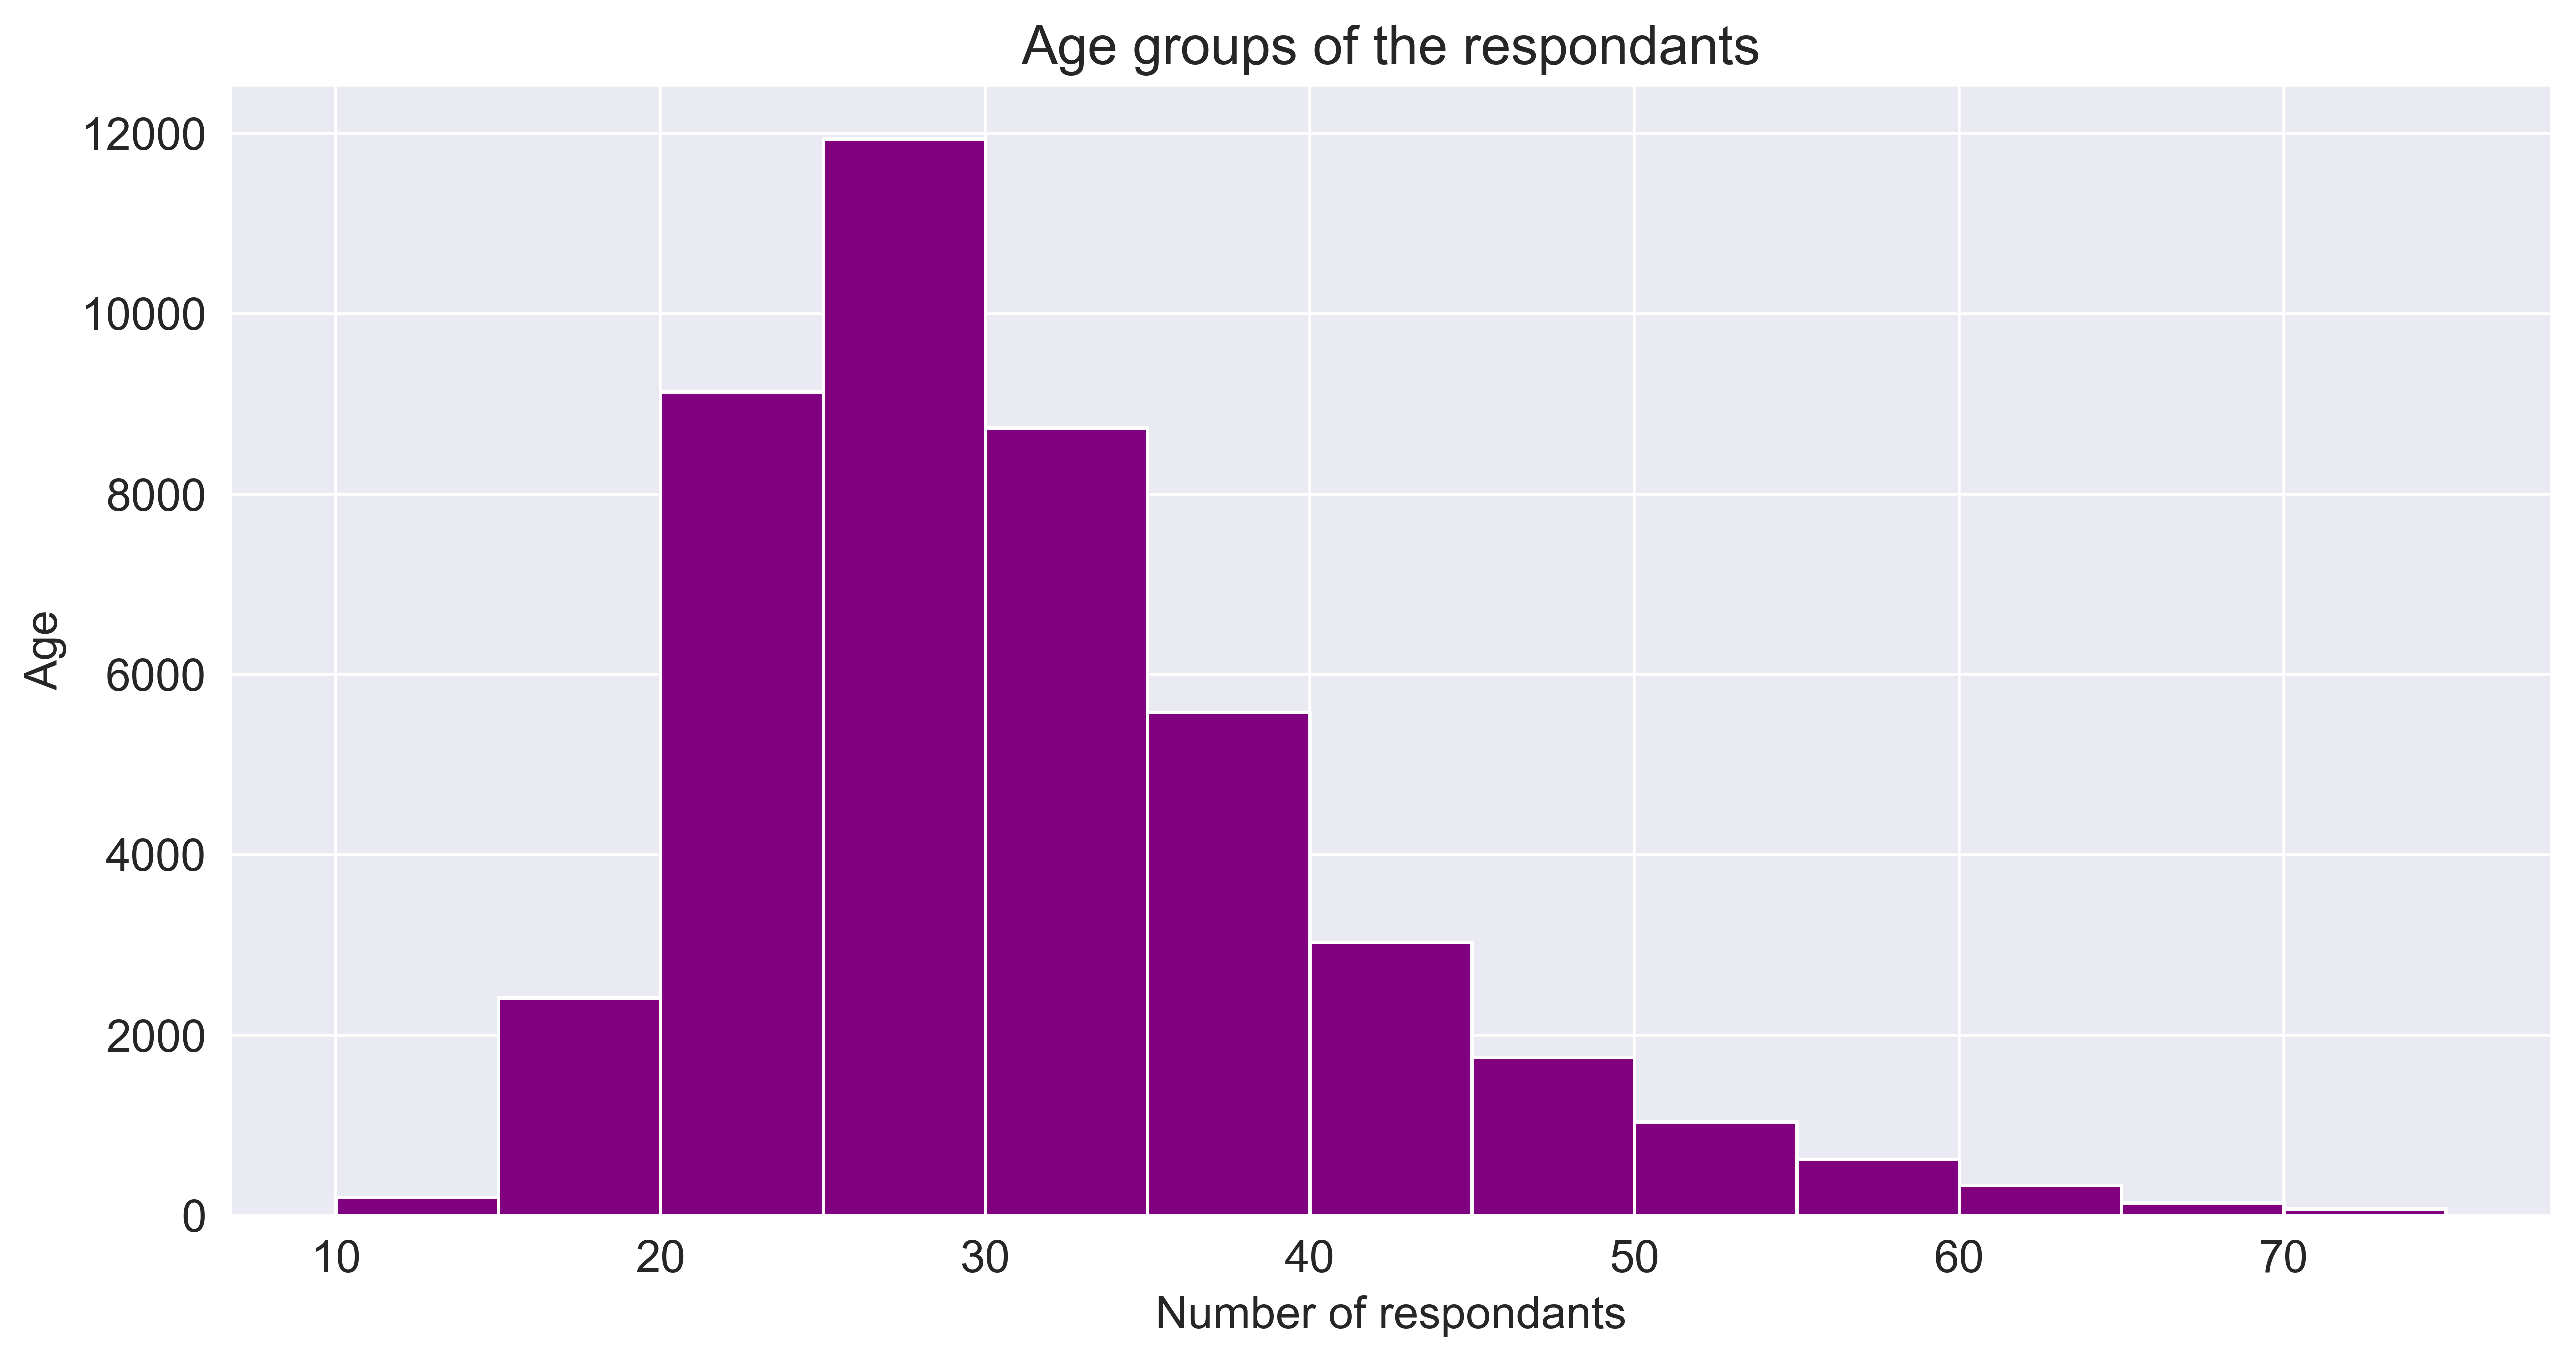

In [42]:
plt.figure(figsize=(12,6),dpi=500)
plt.title('Age groups of the respondants');
plt.xlabel('Number of respondants')
plt.ylabel('Age')
plt.hist(stack_df.Age,bins=np.arange(10,80,5),color='purple');

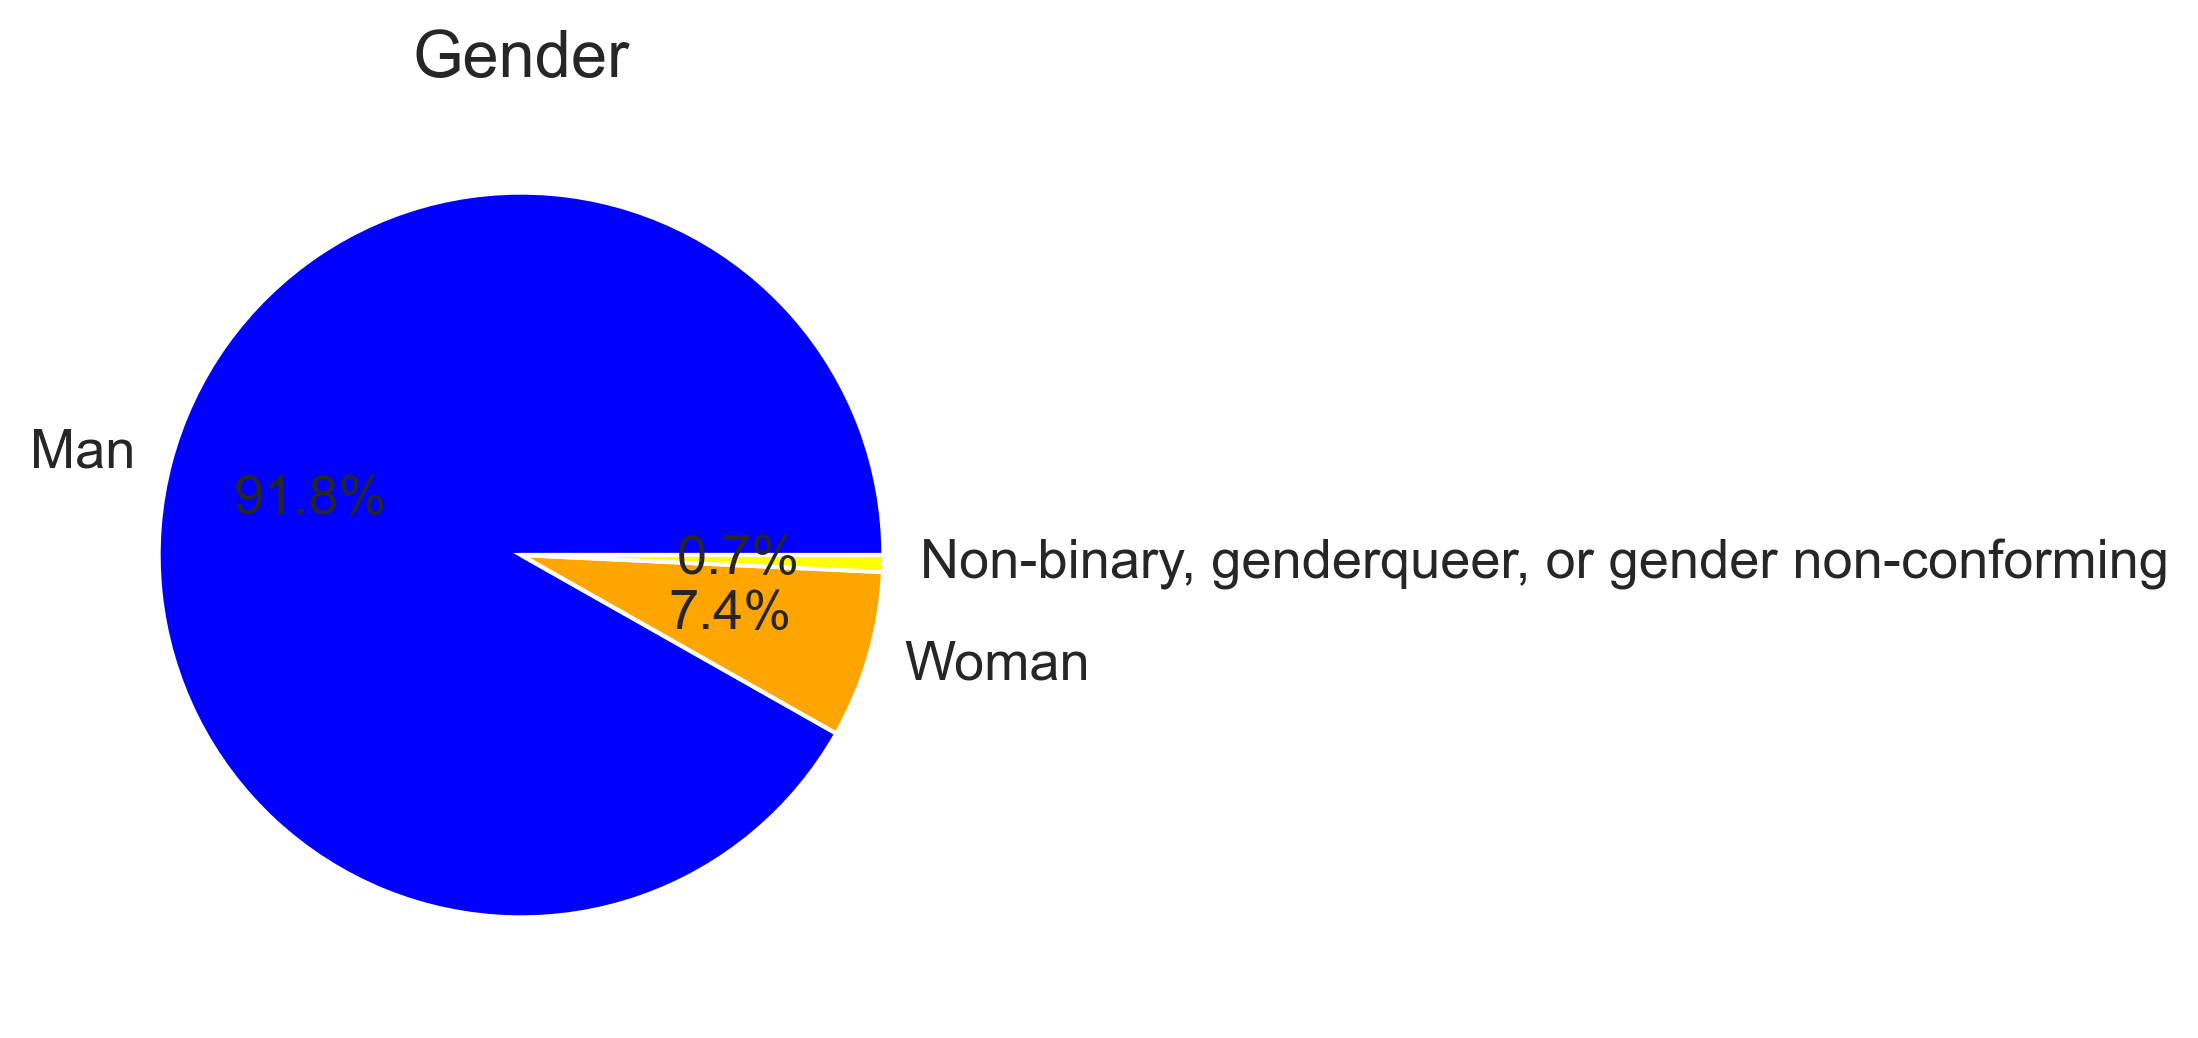

In [43]:
plt.figure(figsize=(4,4),dpi=300);
plt.title('Gender');
gender_df =stack_df.Gender.value_counts();
plt.pie(gender_df,labels = gender_df.index, colors=['blue','orange','yellow'],autopct = '%1.1f%%');
#plt.pie(gender_df,labels= gender_df.index,colors=['red','green','yellow'],autopct='%1.1f%%',wedgeprops={'edgecolor':'black'});

In [44]:
stack_df.Gender.value_counts().index

Index(['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming'], dtype='object')

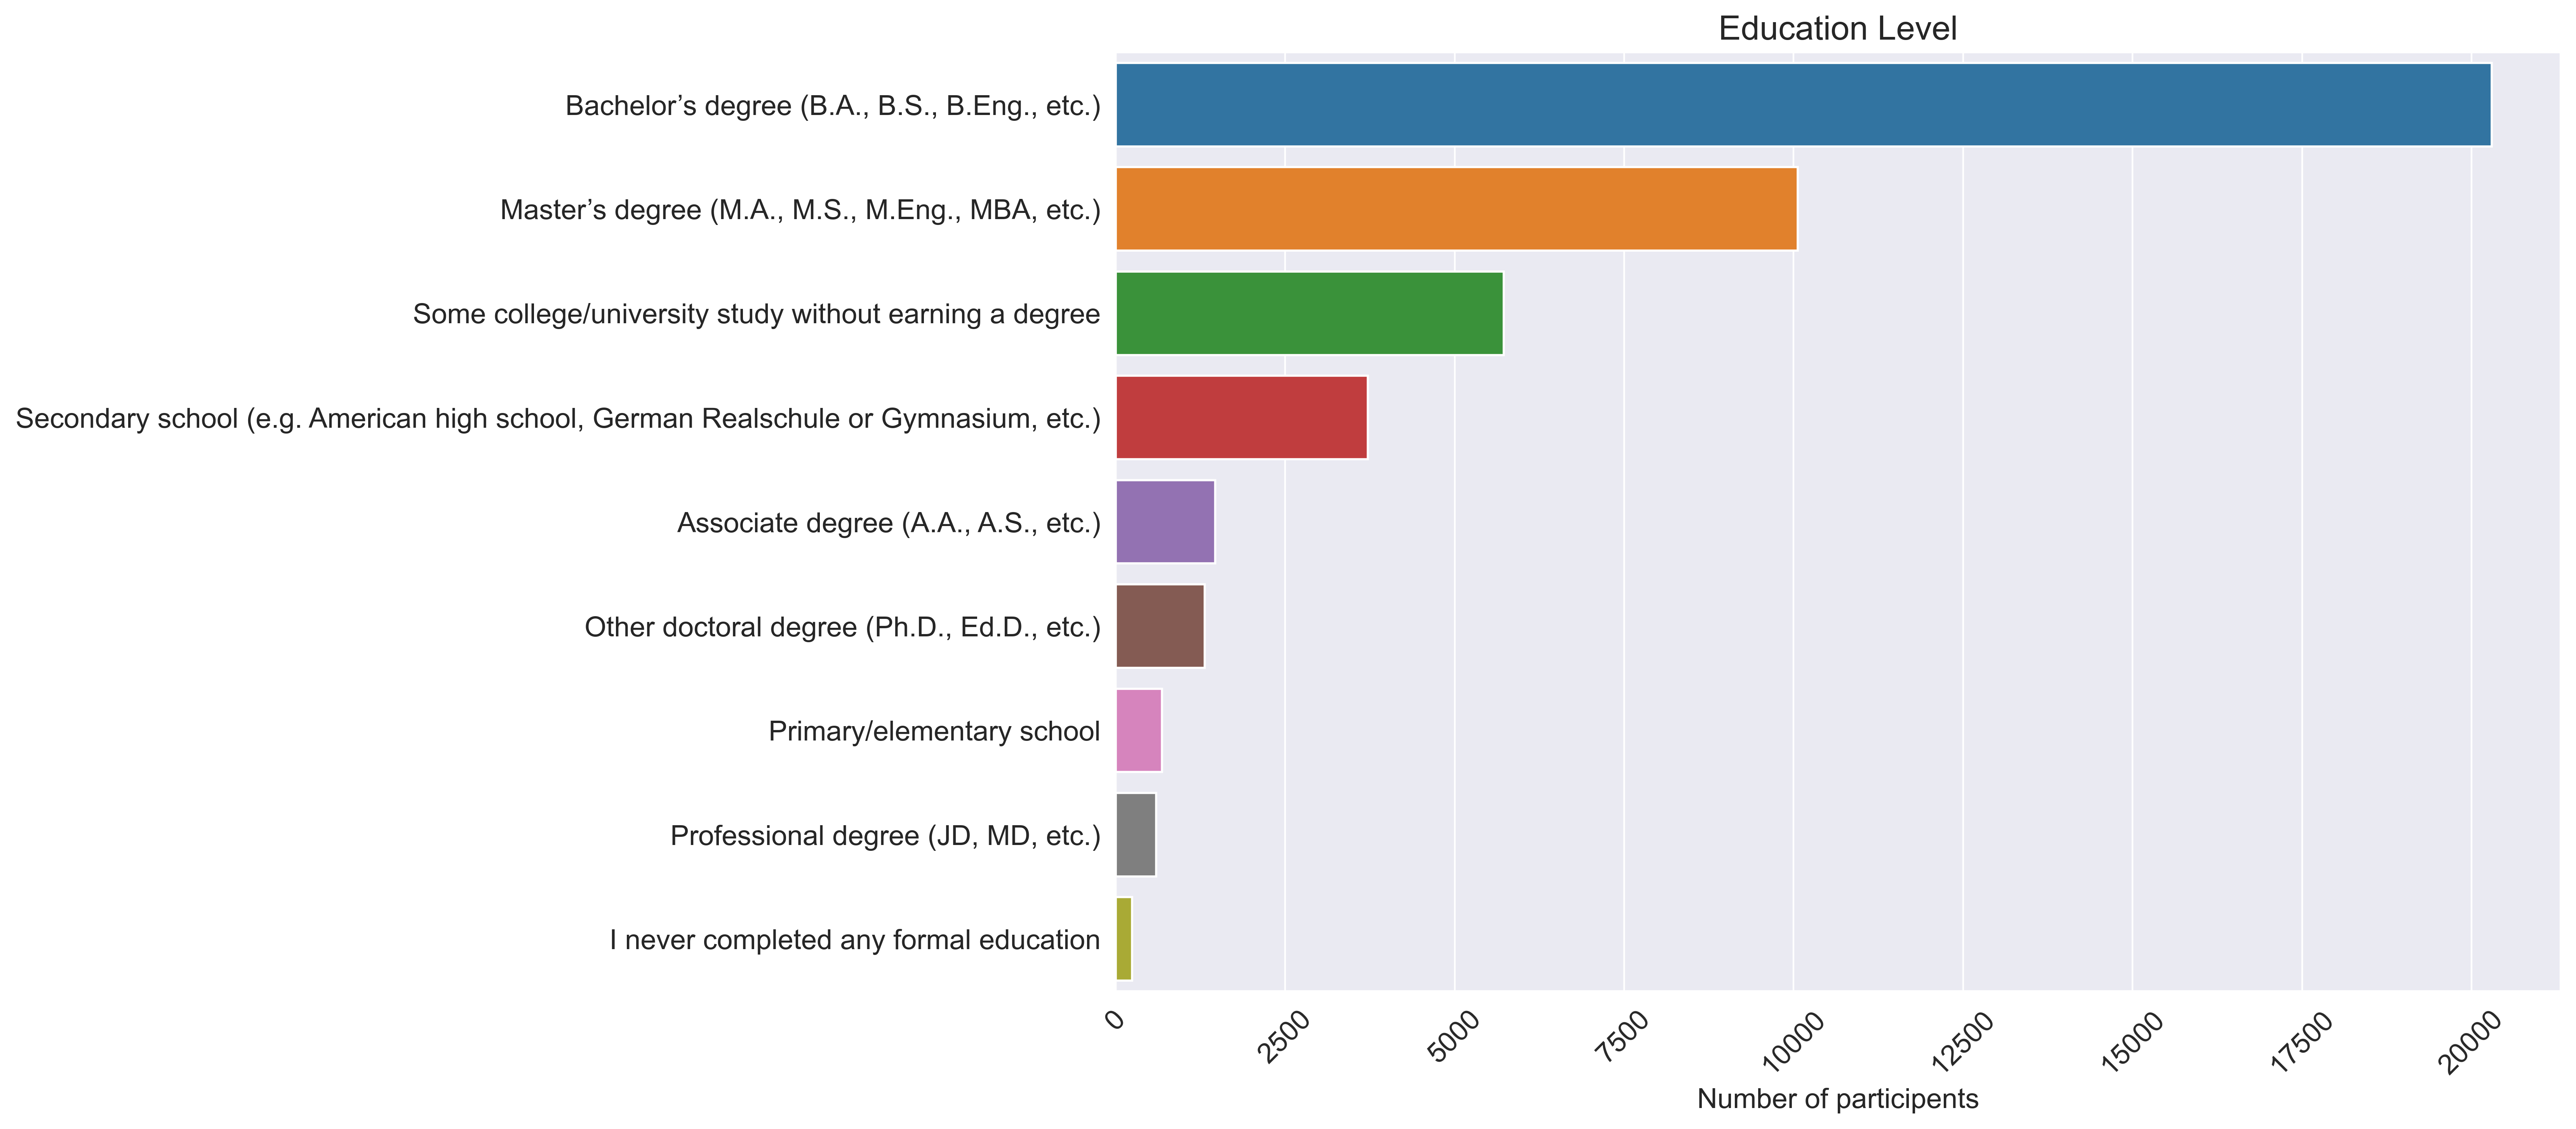

In [45]:
Edlevel_df = stack_df.EdLevel.value_counts()
plt.figure(figsize=(12,8),dpi=400)
plt.title('Education Level');
plt.xticks(rotation='45');
ax1 = sns.barplot(x=Edlevel_df,y=Edlevel_df.index);
ax1.set(xlabel='Number of participents');

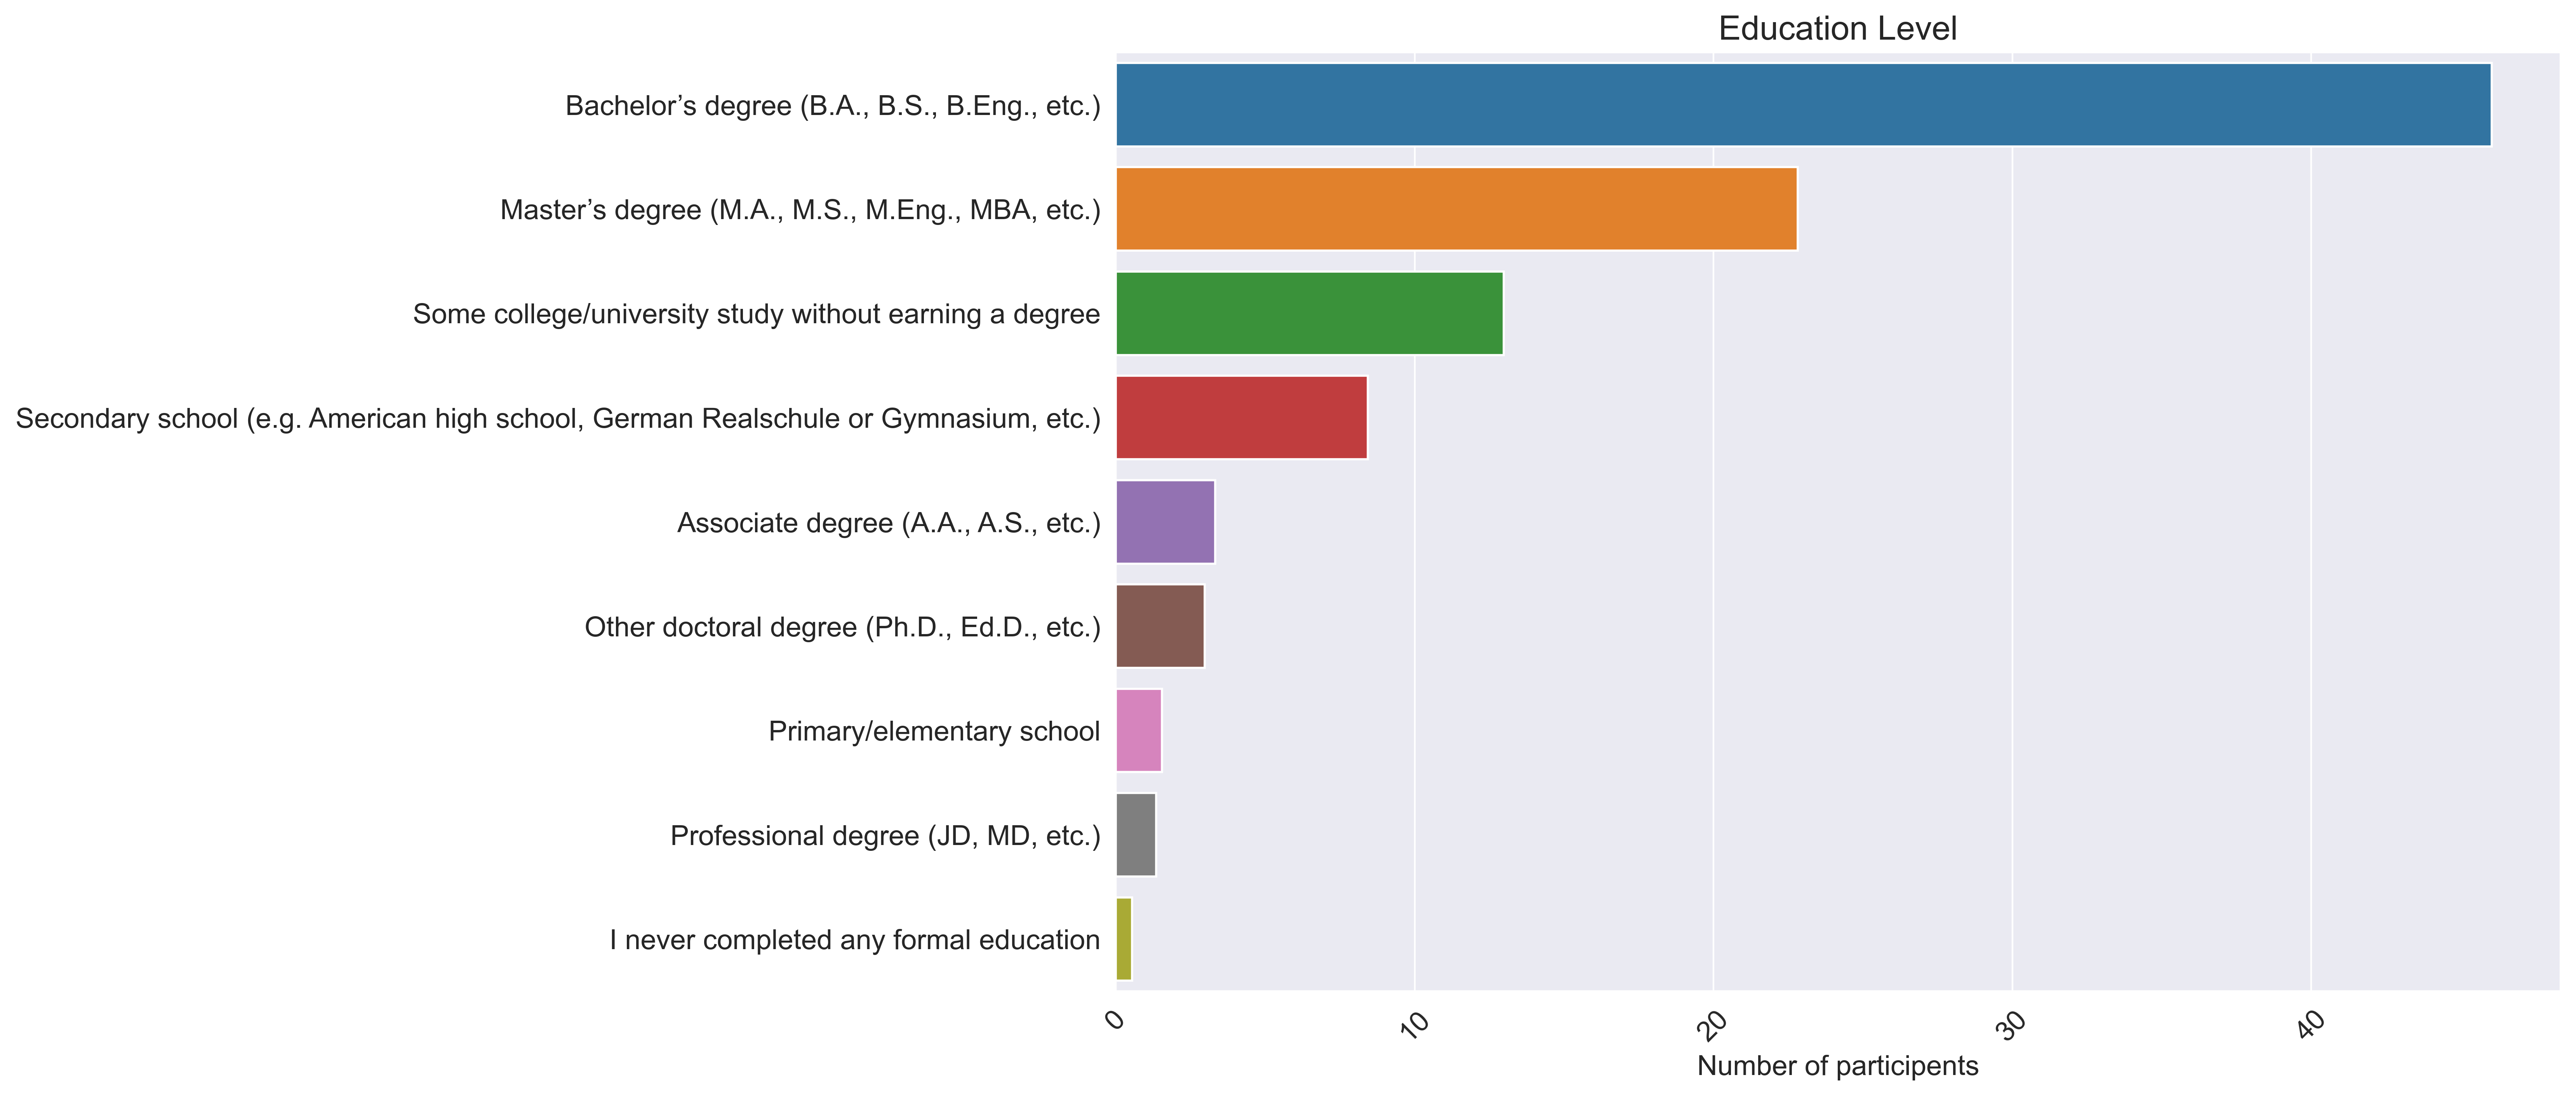

In [46]:
Edlevel_df = stack_df.EdLevel.value_counts() *100 / stack_df.EdLevel.count()
plt.figure(figsize=(12,8),dpi=400)
plt.title('Education Level');
plt.xticks(rotation='45');
ax1 = sns.barplot(x=Edlevel_df,y=Edlevel_df.index);
ax1.set(xlabel='Number of participents');

In [47]:
EdLevel_Gender_df = stack_df.groupby('EdLevel')['Gender'].value_counts().to_frame(name = 'counted_values').reset_index()
new_df = EdLevel_Gender_df.pivot(index='EdLevel',columns='Gender',values='counted_values')     
new_df['EdLevel'] = new_df.index
new_df.reset_index(drop=True,inplace=True)
cols = list(new_df.columns)
new_df = new_df[['EdLevel','Man','Non-binary, genderqueer, or gender non-conforming','Woman']]
new_df

Gender                                                                             EdLevel  \
0                                                      Associate degree (A.A., A.S., etc.)   
1                                             Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                                   I never completed any formal education   
3                                          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4                                               Other doctoral degree (Ph.D., Ed.D., etc.)   
5                                                                Primary/elementary school   
6                                                       Professional degree (JD, MD, etc.)   
7       Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   
8                                   Some college/university study without earning a degree   

Gender    Man  Non-binary, genderqueer, or gender non-conforming  Woman  
0        1340                                                 11     89  
1       18271                                                124   1696  
2         217                                                  3      7  
3        9072                                                 59    794  
4        1151                                                 10    124  
5         643                                                  4     17  
6         545                                                  3     35  
7        3437                                                 45    181  
8        5287                                                 63    289

In [48]:
total_number = new_df.Man.sum() + new_df.Woman.sum()+new_df['Non-binary, genderqueer, or gender non-conforming'].sum()
#plt.title('Gender divided number of people');
#plt.xticks(rotation='90');
#new_df.plot(x=new_df.index,y=['Man', 'Non-binary, genderqueer, or gender non-conforming', 'Woman'],kind='bar')
#sns.barplot(x=new_df.EdLevel,y=[[new_df.Man,new_df.Woman]]);

<AxesSubplot:xlabel='EdLevel', ylabel='count'>

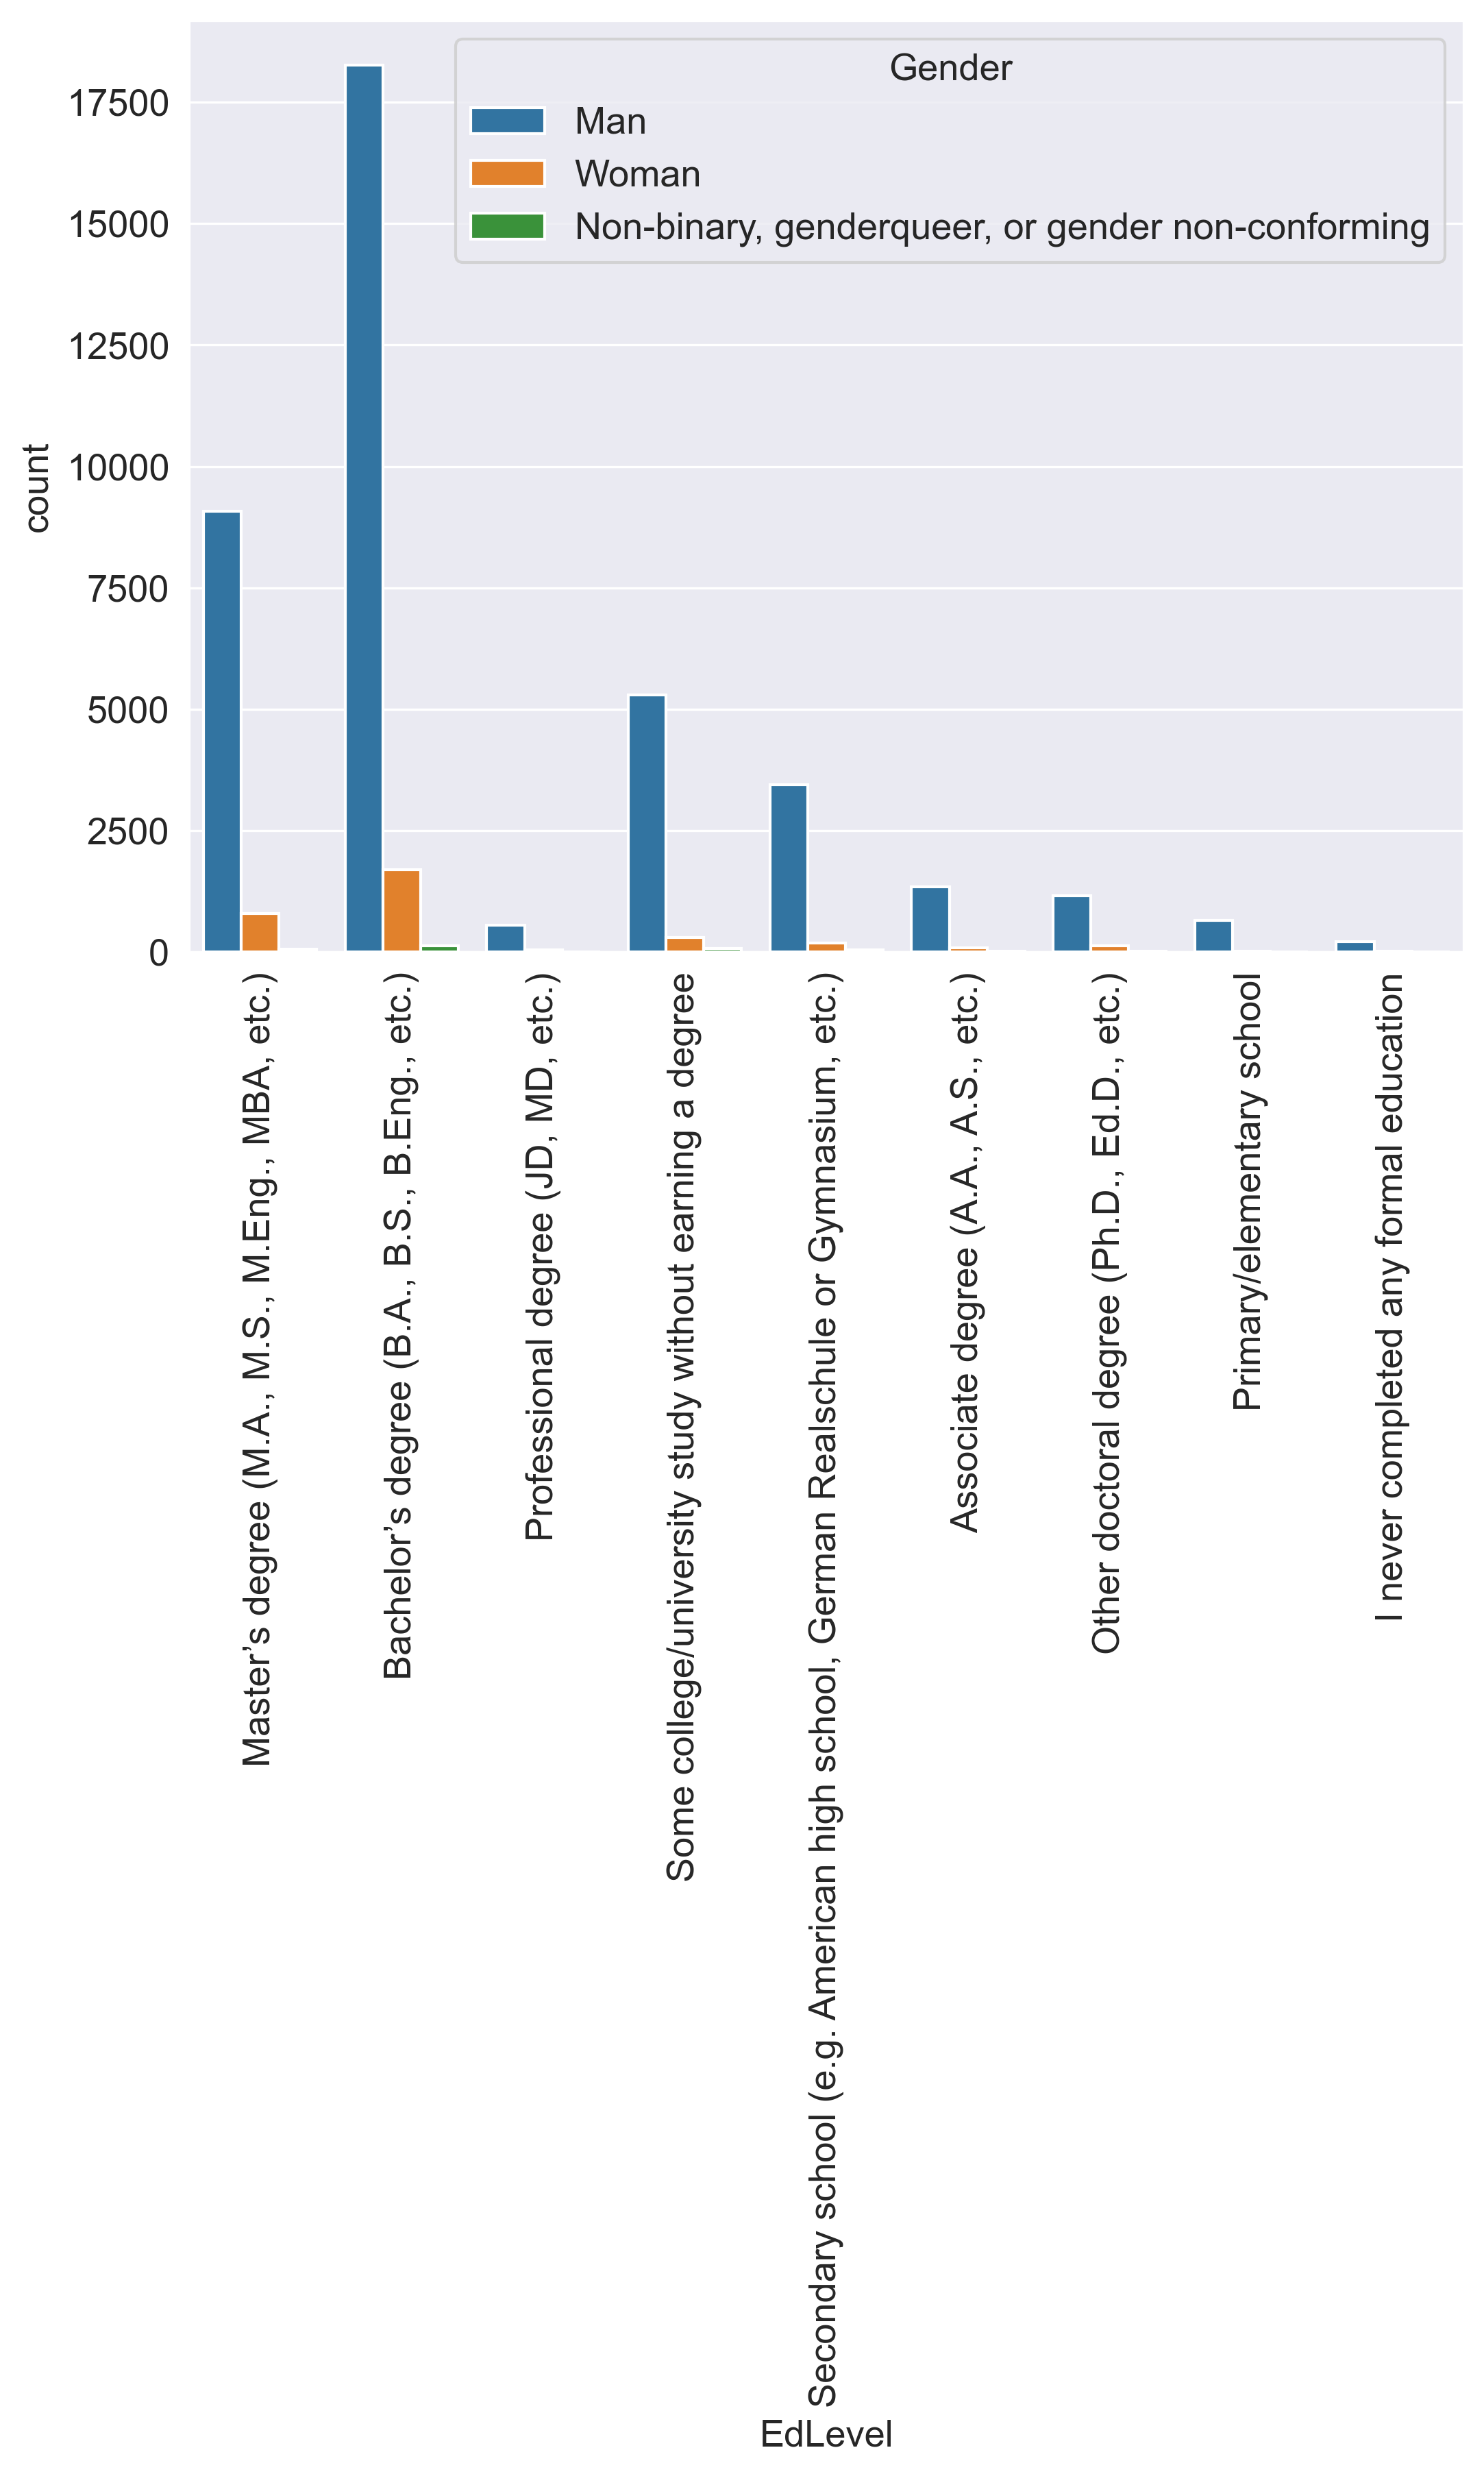

In [49]:
plt.figure(figsize=(8,6),dpi = 300)
plt.xticks(rotation='90')
sns.countplot(x='EdLevel',hue='Gender',data=stack_df)

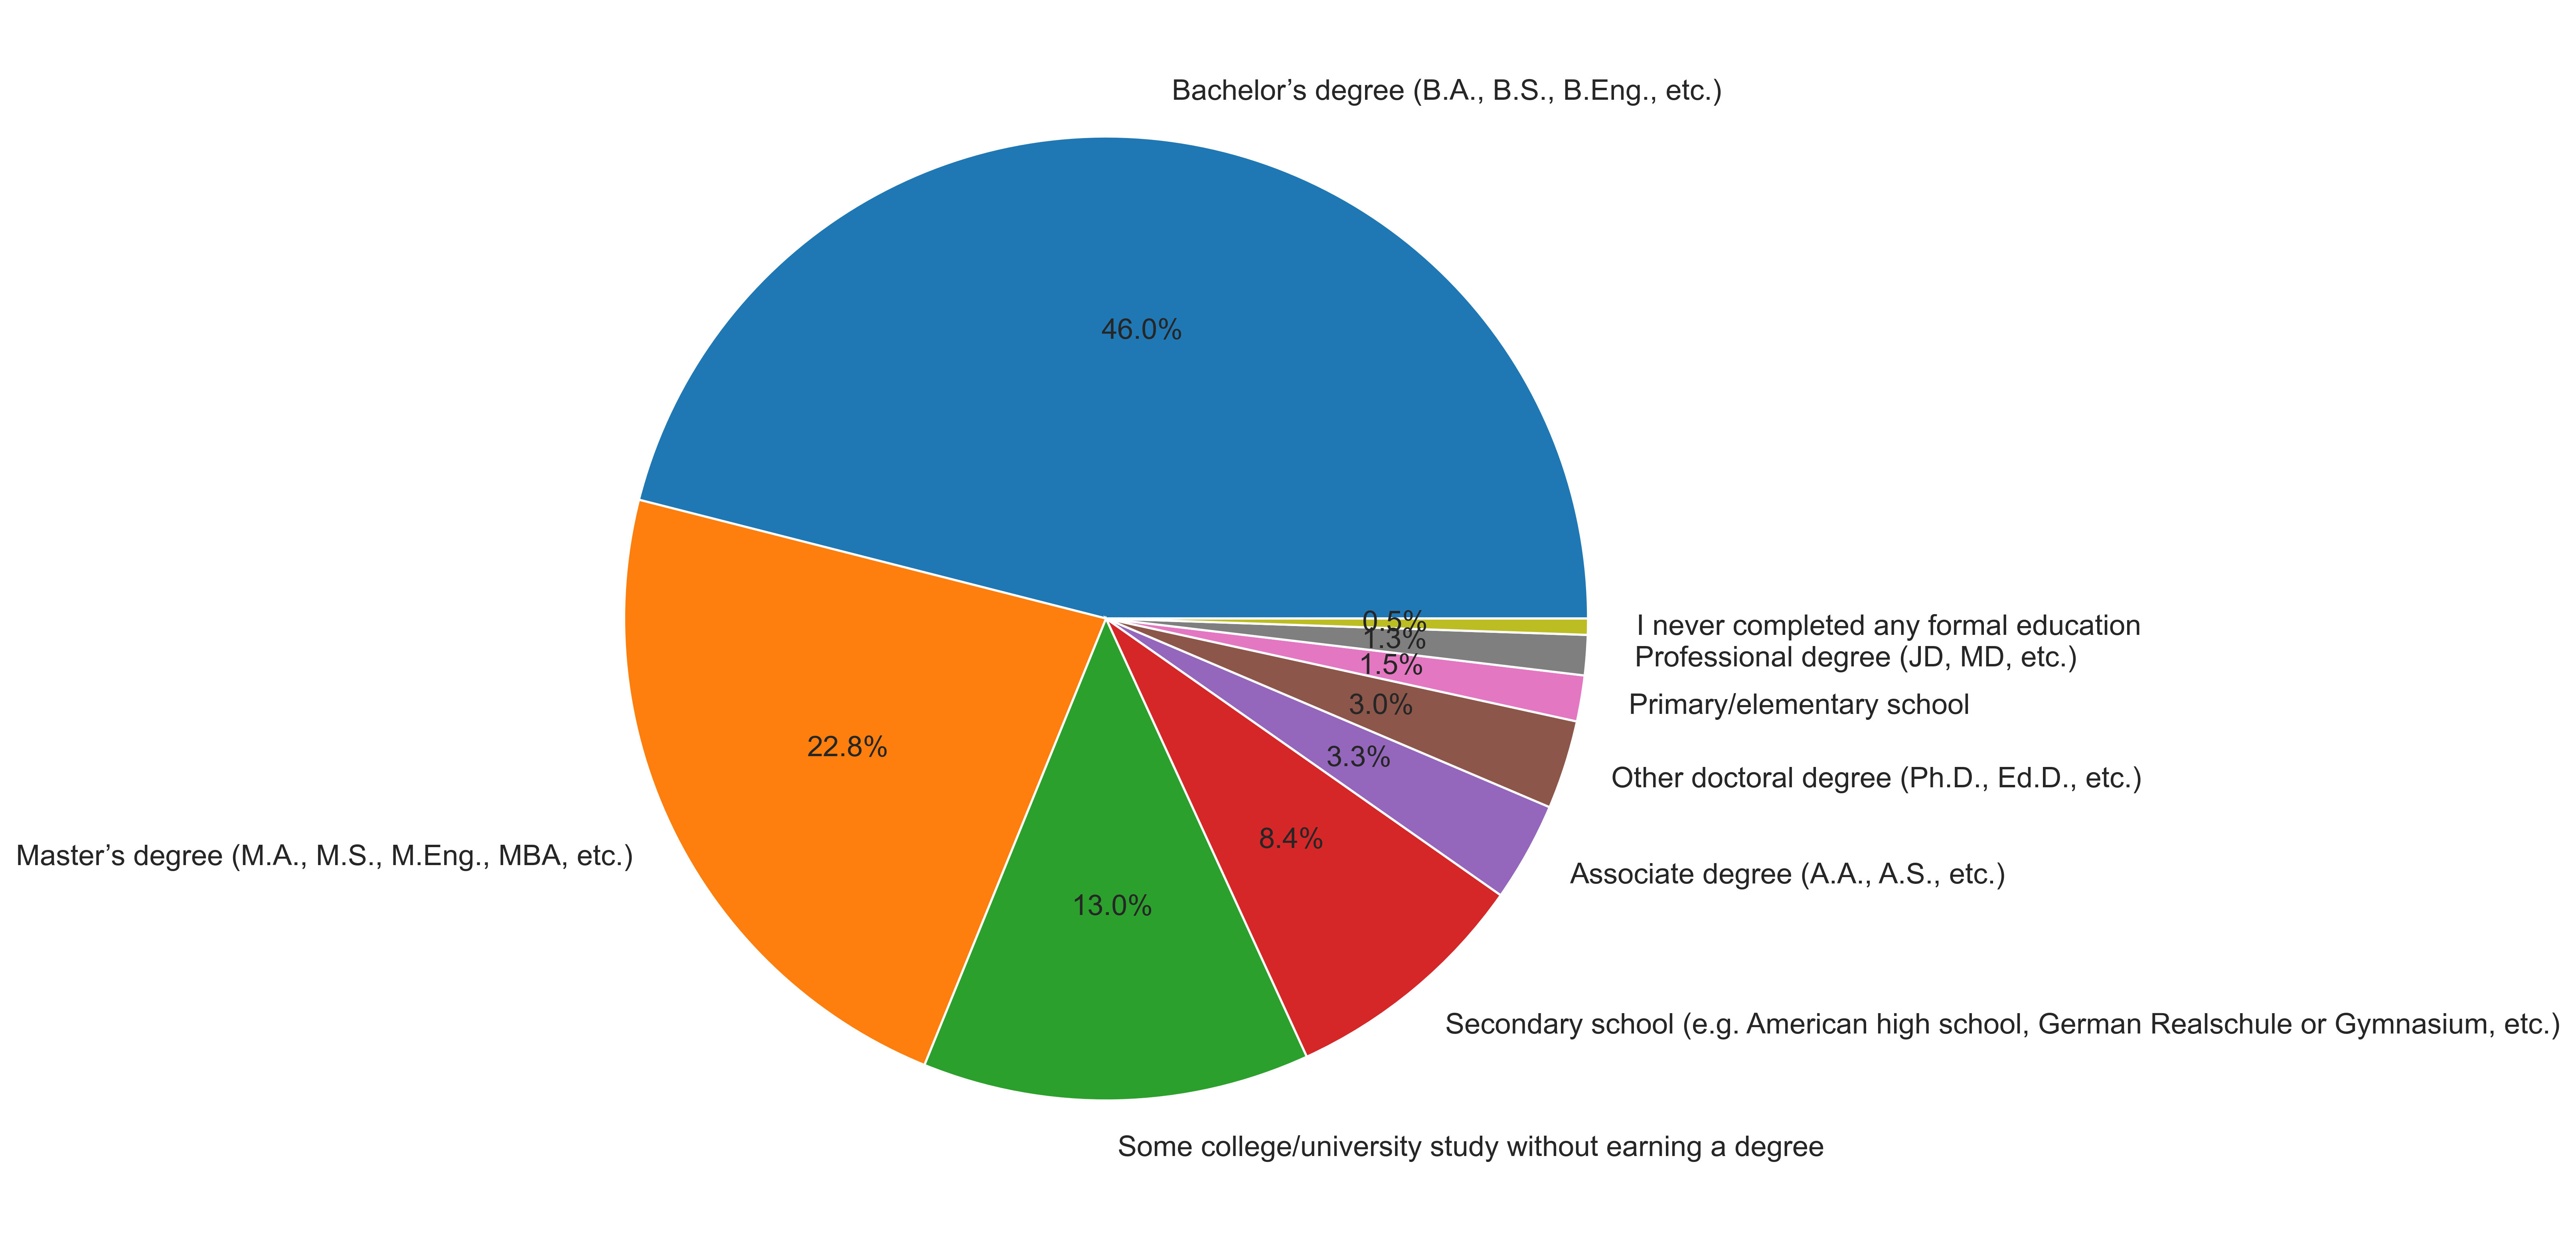

In [50]:
plt.figure(figsize=(10,10),dpi=400)
plt.pie(Edlevel_df,labels=Edlevel_df.index,autopct = '%1.1f%%');

In [51]:
stack_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

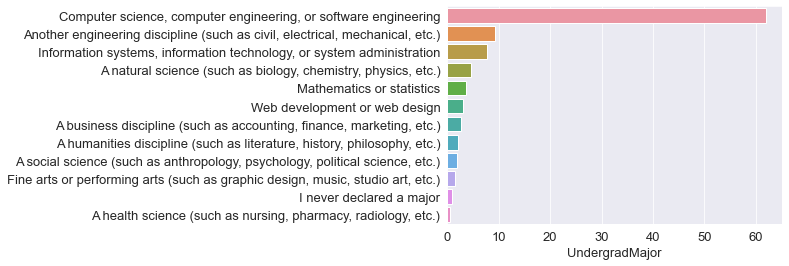

In [52]:
major_df = stack_df.UndergradMajor.value_counts()*100/stack_df.UndergradMajor.count()
sns.barplot(x=major_df,y=major_df.index);

In [53]:
stack_df.Employment.value_counts()

Employed full-time                                      32451
Student                                                  5146
Independent contractor, freelancer, or self-employed     3966
Not employed, but looking for work                       1522
Employed part-time                                       1496
Not employed, and not looking for work                    206
Retired                                                   157
Name: Employment, dtype: int64

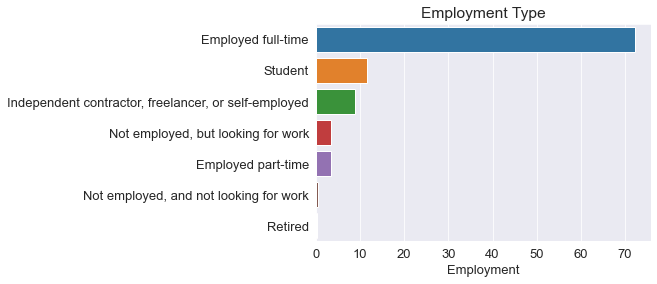

In [54]:
employment_df = stack_df.Employment.value_counts() *100 / stack_df.Employment.count()
plt.title('Employment Type');
sns.barplot(y=employment_df.index,x=employment_df);

In [55]:
for ind, row in stack_df.iterrows():
    if stack_df.loc[ind,'Employment'] == 'Student' or stack_df.loc[ind,'Employment'] == 'Not employed, but looking for work':
        stack_df.loc[ind,'EmploymentType'] = 'Enthusiast'
    elif stack_df.loc[ind,'Employment'] == 'Employed full-time' or stack_df.loc[ind,'Employment'] == 'Employed part-time' or stack_df.loc[ind,'Employment'] == 'Independent contractor, freelancer, or self-employed':
        stack_df.loc[ind,'EmploymentType'] = 'Professional'
    else:
        stack_df.loc[ind,'EmploymentType'] = 'Other'
stack_df
        

Country   Age Gender  \
Index                                
0             Albania  25.0    Man   
1       United States  31.0    Man   
2       United States  36.0    Man   
3             Tunisia  30.0    Man   
4      United Kingdom  22.0    Man   
...               ...   ...    ...   
45309           Spain  22.0    Man   
45310          Brazil  34.0    Man   
45311          Israel  38.0    Man   
45312          France  64.0    Man   
45313          Canada  17.0    Man   

                                                                                  EdLevel  \
Index                                                                                       
0                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3                                                      Professional degree (JD, MD, etc.)   
4                                         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                                                   ...   
45309                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
45310                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45311                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
45312                                                                                 NaN   
45313  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   

                                                              UndergradMajor  \
Index                                                                          
0            Computer science, computer engineering, or software engineering   
1            Computer science, computer engineering, or software engineering   
2            Computer science, computer engineering, or software engineering   
3            Computer science, computer engineering, or software engineering   
4                                                  Mathematics or statistics   
...                                                                      ...   
45309        Computer science, computer engineering, or software engineering   
45310        Computer science, computer engineering, or software engineering   
45311                                                                    NaN   
45312  Information systems, information technology, or system administration   
45313                                                                    NaN   

      Hobbyist  Age1stCode  YearsCode  YearsCodePro  \
Index                                                 
0          Yes        18.0        7.0           4.0   
1          Yes        16.0       15.0           8.0   
2          Yes        12.0       17.0          13.0   
3           No        20.0        6.0           4.0   
4          Yes        14.0        8.0           4.0   
...        ...         ...        ...           ...   
45309      Yes        10.0       10.0           NaN   
45310      Yes        18.0       16.0          14.0   
45311      Yes        35.0        3.0           NaN   
45312      Yes        18.0       30.0           NaN   
45313      Yes        10.0        7.0           NaN   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python

In [56]:
devtype_series_df = stack_df.DevType


In [57]:
def split_multicolumns(col_series):
    full_options_list = list()
    result_df = col_series.to_frame()
    options_list = list(col_series.unique())
    options_list.remove(np.nan)
    for option in options_list:
        for word in option.split(';'):
            if word not in result_df.columns:
                full_options_list.append(word)
    result_df[full_options_list] = False
    for ind, options in col_series[col_series.notnull()].iteritems():
        for word in options.split(';'):
            result_df.loc[ind,word] = True
    return result_df

In [58]:
devtype_df = split_multicolumns(devtype_series_df)
devtype_df

DevType  \
Index                                                                                                  
0                                                                                                NaN   
1                                                                                                NaN   
2      Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics   
3                                                                              Developer, full-stack   
4                                     Database administrator;Developer, full-stack;Developer, mobile   
...                                                                                              ...   
45309                                                                                            NaN   
45310                                                                            Senior executive/VP   
45311                                                                                            NaN   
45312                                                                                            NaN   
45313                                                                                            NaN   

       Developer, back-end  Developer, desktop or enterprise applications  \
Index                                                                       
0                    False                                          False   
1                    False                                          False   
2                     True                                           True   
3                    False                                          False   
4                    False                                          False   
...                    ...                                            ...   
45309                False                                          False   
45310                False                                          False   
45311                False                                          False   
45312                False                                          False   
45313                False                                          False   

       Developer, game or graphics  Developer, full-stack  \
Index                                                       
0                            False                  False   
1                            False                  False   
2                             True                  False   
3                            False                   True   
4                            False                   True   
...                            ...                    ...   
45309                        False                  False   
45310                        False                  False   
45311                        False                  False   
45312                        False                  False   
45313                        False                  False   

       Database administrator  Developer, mobile  \
Index                                              
0                       False              False   
1                       False              False   
2                       False              False   
3                       False              False   
4                        True               True   
...                       ...                ...   
45309                   False              False   
45310                   False              False   
45311                   False              False   
45312                   False              False   
45313                   False              False   

       Developer, embedded applications or devices  Developer, front-end  \
Index                                                                      
0                                            False                 False   
1                                      

In [59]:
devtype_totals = devtype_df.sum().sort_values(ascending=False)
devtype_totals_df = devtype_totals.to_frame()
devtype_totals_df

0
Developer, back-end                            21730
Developer, full-stack                          21709
Developer, front-end                           14467
Developer, desktop or enterprise applications   9375
Developer, mobile                               7385
DevOps specialist                               4887
Database administrator                          4556
System administrator                            4214
Designer                                        4037
Developer, embedded applications or devices     3663
Developer, QA or test                           3143
Data scientist or machine learning specialist   3039
Data or business analyst                        3035
Engineer, data                                  2873
Academic researcher                             2637
Educator                                        2317
Developer, game or graphics                     2211
Engineering manager                             2144
Product manager                                 1990
Scientist                                       1652
Engineer, site reliability                      1559
Senior executive/VP                              997
Marketing or sales professional                  457

In [60]:
data_scientist_percentage = devtype_totals_df[devtype_totals.index=='Data scientist or machine learning specialist']*100 /stack_df.DevType.count()
data_scientist_percentage

0
Data scientist or machine learning specialist  7.830456

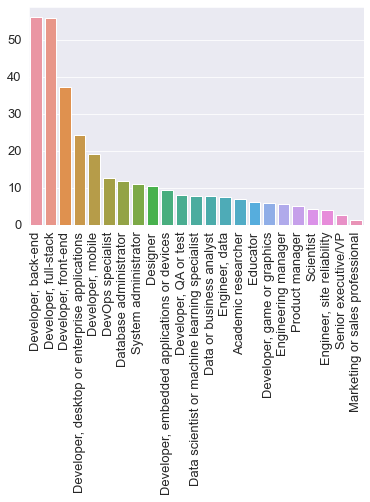

In [61]:
plt.xticks(rotation='vertical');
sns.barplot(x=devtype_totals.index,y=devtype_totals*100/stack_df.DevType.count());

In [62]:
#merged_df = stack_df.merge(devtype_df,on='DevType')

In [63]:
#merged_df

In [64]:
stack_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Language', 'Age-group', 'EmploymentType'],
      dtype='object')

In [65]:
language_series = stack_df.LanguageWorkedWith
coding_languages_df = split_multicolumns(language_series)

In [66]:
coding_languages_df

LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

       HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java     C#  Swift  \
Index                                                                           
0         False  False  False   False       False  False  False  False  False   
1          True   True   True   False       False  False  False  False  False   
2         False  False   True    True       False  False  False  False  False   
3          True  False  False   False        True   True  False  False  False   
4          True  False   True    True        True  False   True  False  False   
...         ...    ...    ...     ...         ...    ...    ...    ...    ...   
45309      True  False   True    True       False  False   True  False  False   
45310     False  False   True    True       False  False  False  False  False   
45311      True  False  False    True        True  False  False  False  False   
45312      True  False   True    True        True   True  False  False  False   
45313     False  False  False   False       False  False   True   True  False   

       ...   Perl  Objective-C  Scala    C++     Go  Haskell   Rust   Dart  \
Index  ...                                                                   
0      ...  False        False  False  False  False    False  False  False   
1      ...  False        False  False  False  False    False  False  False   
2      ...  False        False  False  False  False    False  False  False   
3      ...  False        False  False  False  False    False  False  False   
4      ...  False        False  False  False  False    False  False  False   
...    ...    ...          ...    ...    ...    ...      ...    ...    ...   
45309  ...  False        False  False   True  False    False   True   True   
45310  ...  False        False  False  False  False    False  False  False   
45311  ...  False        False  False  False  False    False  False  False   
45312  ...   True        False  False  False  False    False  False  False   
45313  ...  False        False  False   True  False    False  False  False   

       Julia  Assembly  
Index                   
0      False     False  
1      False     False  
2      False     False  
3      False     False  
4      False     False  
...      ...       ...  
45309  False      True  
45310  False     False  
45311  False     False  
45312  False     False  
45313  False     False  

[45314 rows x 26 columns]

In [67]:
coding_total_df= coding_languages_df.sum().sort_values(ascending=False)
coding_total_df

JavaScript               30558
HTML/CSS                 28306
SQL                      24794
Python                   19855
Java                     17628
Bash/Shell/PowerShell    15572
C#                       14189
TypeScript               11758
PHP                      11444
C++                      10250
C                         9240
Go                        3987
Kotlin                    3544
Ruby                      3274
VBA                       2656
Swift                     2624
Assembly                  2617
R                         2569
Rust                      2371
Objective-C               1778
Dart                      1710
Scala                     1633
Perl                      1361
Haskell                    918
Julia                      363
dtype: int64

<AxesSubplot:>

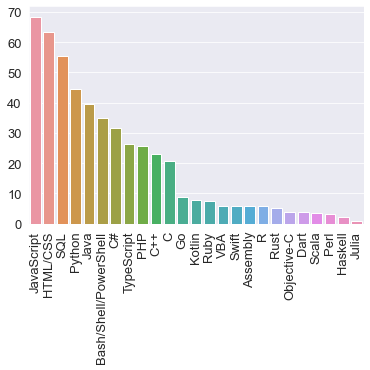

In [68]:
plt.xticks(rotation='vertical')
sns.barplot(x=coding_total_df.index,y=coding_total_df*100/stack_df.LanguageWorkedWith.count())

In [69]:
stack_df.columns
select_col = ['Employment']
empl_codinglang_df = stack_df[select_col].copy()
empl_codinglang_df

Employment
Index                                                      
0                                                       NaN
1                                        Employed full-time
2                                        Employed full-time
3      Independent contractor, freelancer, or self-employed
4                                        Employed full-time
...                                                     ...
45309                                               Student
45310                                    Employed full-time
45311                    Not employed, but looking for work
45312                                               Retired
45313                                               Student

[45314 rows x 1 columns]

In [70]:
merged_df = pd.concat([empl_codinglang_df,coding_languages_df.reindex(empl_codinglang_df.index)],axis=1)

In [71]:
merged_df

Employment  \
Index                                                         
0                                                       NaN   
1                                        Employed full-time   
2                                        Employed full-time   
3      Independent contractor, freelancer, or self-employed   
4                                        Employed full-time   
...                                                     ...   
45309                                               Student   
45310                                    Employed full-time   
45311                    Not employed, but looking for work   
45312                                               Retired   
45313                                               Student   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

       HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java     C#  ...  \
Index                                                                   ...   
0         False  False  False   False       False  False  False  False  ...   
1          True   True   True   False       False  False  False  False  ...   
2         False  False   True    True       False  False  False  False  ...   
3          True  False  False   False        True   True  False  False  ...   
4          True  False   True    True        True  False   True  False  ...   
...         ...    ...    ...     ...         ...    ...    ...    ...  ...   
45309      True  False   True    True       False  False   True  False  ...   
45310     False  False   True    True       False  False  False  False  ...   
45311      True  False  False    True        True  False  False  False  ...   
45312      True  False   True    True        True   True  False  False  ...   
45313     False  False  False   False       False  False   True   True  ...   

        Perl  Objective-C  Scala    C++     Go  Haskell   Rust   Dart  Julia  \
Index                                                                          
0      False        False  False  False  False    False  False  False  False   
1      False        False  False  False  False    False  False  False  False   
2      False        False  False  False  False    False  False  False  False   
3      False        False  False  False  False    False  False  False  False   
4      False        False  False  False  False    False  False  False  False   
...      ...          ...    ...    ...    ...      ...    ...    ...    ...   
45309  False        False  False   True  False    False   True   True  False   
45310  False        False  False  False  False    False  False  False  False   
45311  False        False  False  False  False    False  False  False  False   
45312   True        False  False  False  False    False  False  False  False   
45313  False        False  False   True  False    False  False  False  False   

       Assembly  
Index            
0         False  
1         False  
2         False  
3         False  
4         F

In [72]:
merged_df.sum().sort_values(ascending = False)

JavaScript               30558
HTML/CSS                 28306
SQL                      24794
Python                   19855
Java                     17628
Bash/Shell/PowerShell    15572
C#                       14189
TypeScript               11758
PHP                      11444
C++                      10250
C                         9240
Go                        3987
Kotlin                    3544
Ruby                      3274
VBA                       2656
Swift                     2624
Assembly                  2617
R                         2569
Rust                      2371
Objective-C               1778
Dart                      1710
Scala                     1633
Perl                      1361
Haskell                    918
Julia                      363
dtype: int64

In [73]:
raw_desiredlanguages_list = list(stack_df.LanguageDesireNextYear.unique())
raw_desiredlanguages_list.remove(np.nan)
desired_languages_list = list()
for phrase in raw_desiredlanguages_list:
    for word in phrase.split(';'):
        if word not in desired_languages_list:
            desired_languages_list.append(word)
desired_languages_list
len(desired_languages_list)

25

In [74]:
stack_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Language', 'Age-group', 'EmploymentType'],
      dtype='object')

In [75]:
LanguageDesireNextYear_series = stack_df.LanguageDesireNextYear

In [76]:
LanguageDesireNextYear_df = split_multicolumns(LanguageDesireNextYear_series)
LanguageDesireNextYear_df

LanguageDesireNextYear  \
Index                                                                     
0                                                                   NaN   
1                                                       Java;Ruby;Scala   
2                                                            JavaScript   
3                                                           Python;Rust   
4                                 HTML/CSS;Java;JavaScript;Python;R;SQL   
...                                                                 ...   
45309              Assembly;C;C++;Go;Java;Kotlin;Python;Rust;TypeScript   
45310                                                        Python;SQL   
45311                           Haskell;HTML/CSS;JavaScript;Python;Rust   
45312  Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                Assembly;C#;Kotlin   

        Java   Ruby  Scala  JavaScript  Python   Rust  HTML/CSS      R    SQL  \
Index                                                                           
0      False  False  False       False   False  False     False  False  False   
1       True   True   True       False   False  False     False  False  False   
2      False  False  False        True   False  False     False  False  False   
3      False  False  False       False    True   True     False  False  False   
4       True  False  False        True    True  False      True   True   True   
...      ...    ...    ...         ...     ...    ...       ...    ...    ...   
45309   True  False  False       False    True   True     False  False  False   
45310  False  False  False       False    True  False     False  False   True   
45311  False  False  False        True    True   True      True  False  False   
45312  False  False  False        True    True  False      True  False   True   
45313  False  False  False       False   False  False     False  False  False   

       ...  Bash/Shell/PowerShell    C++  Julia  Kotlin   Dart    PHP      C  \
Index  ...                                                                     
0      ...                  False  False  False   False  False  False  False   
1      ...                  False  False  False   False  False  False  False   
2      ...                  False  False  False   False  False  False  False   
3      ...                  False  False  False   False  False  False  False   
4      ...                  False  False  False   False  False  False  False   
...    ...                    ...    ...    ...     ...    ...    ...    ...   
45309  ...                  False   True  False    True  False  False   True   
45310  ...                  False  False  False   False  False  False  False   
45311  ...                  False  False  False   False  False  False  False   
45312  ...                   True  False  False   False  False   True  False   
45313  ...                  False  False  False    True  False  False  False   

       Assembly  Objective-C    VBA  
Index                                
0         False        False  False  
1         False        False  False  
2         False        False  False  
3         False        False  False  
4         False        False  False  
...         ...          ...    ...  
45309      True        False  False  
45310     False        False  False  
45311     False        False  False  
45312     False        False  False  
45313      True        False  False  

[45314 rows x 26 columns]

In [77]:
#Most common languages which people desire to learn next year
total_LanguageDesireNextYear_df = LanguageDesireNextYear_df.sum().sort_values(ascending=False)

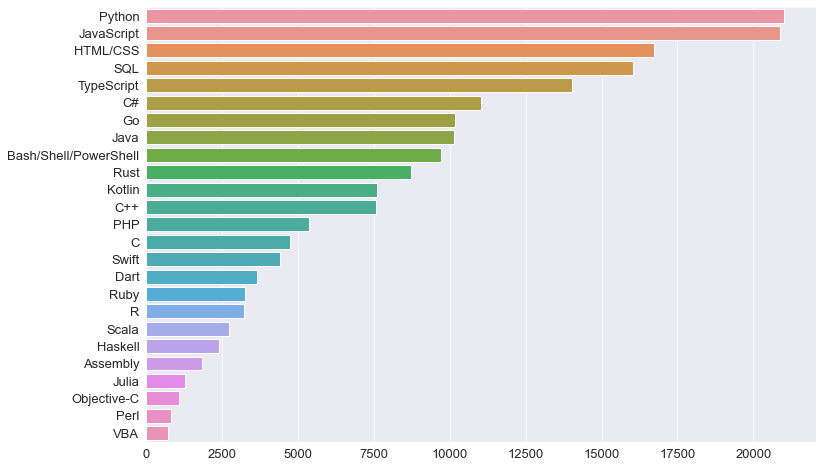

In [78]:
plt.figure(figsize=(12,8));
sns.barplot(x=total_LanguageDesireNextYear_df,y=total_LanguageDesireNextYear_df.index);

In [79]:
raw_schema_df[raw_schema_df.index=='NEWOvertime']

QuestionText
Column                                                                                        
NEWOvertime  How often do you work overtime or beyond the formal time expectation of your job?

In [80]:
cols =['Java', 'Ruby', 'Scala', 'JavaScript', 'Python', 'Rust', 'HTML/CSS',
       'R', 'SQL', 'Go', 'Swift', 'TypeScript', 'C#', 'Haskell', 'Perl',
       'Bash/Shell/PowerShell', 'C++', 'Julia', 'Kotlin', 'Dart', 'PHP', 'C',
       'Assembly', 'Objective-C', 'VBA']

In [81]:
lovable_languag_df = stack_df.LanguageWorkedWith.to_frame()
lovable_languag_df[cols] = False
lovable_languag_df.drop(['LanguageWorkedWith'],axis=1)

Java   Ruby  Scala  JavaScript  Python   Rust  HTML/CSS      R    SQL  \
Index                                                                           
0      False  False  False       False   False  False     False  False  False   
1      False  False  False       False   False  False     False  False  False   
2      False  False  False       False   False  False     False  False  False   
3      False  False  False       False   False  False     False  False  False   
4      False  False  False       False   False  False     False  False  False   
...      ...    ...    ...         ...     ...    ...       ...    ...    ...   
45309  False  False  False       False   False  False     False  False  False   
45310  False  False  False       False   False  False     False  False  False   
45311  False  False  False       False   False  False     False  False  False   
45312  False  False  False       False   False  False     False  False  False   
45313  False  False  False       False   False  False     False  False  False   

          Go  ...  Bash/Shell/PowerShell    C++  Julia  Kotlin   Dart    PHP  \
Index         ...                                                              
0      False  ...                  False  False  False   False  False  False   
1      False  ...                  False  False  False   False  False  False   
2      False  ...                  False  False  False   False  False  False   
3      False  ...                  False  False  False   False  False  False   
4      False  ...                  False  False  False   False  False  False   
...      ...  ...                    ...    ...    ...     ...    ...    ...   
45309  False  ...                  False  False  False   False  False  False   
45310  False  ...                  False  False  False   False  False  False   
45311  False  ...                  False  False  False   False  False  False   
45312  False  ...                  False  False  False   False  False  False   
45313  False  ...                  False  False  False   False  False  False   

           C  Assembly  Objective-C    VBA  
Index                                       
0      False     False        False  False  
1      False     False        False  False  
2      False     False        False  False  
3      False     False        False  False  
4      False     False        False  False  
...      ...       ...          ...    ...  
45309  False     False        False  False  
45310  False     False        False  False  
45311  False     False        False  False  
45312  False     False        False  False  
45313  False     False        False  False  

[45314 rows x 25 columns]

In [82]:
#for coding_lang in cols:
#    for ind, row in coding_languages_df.iterrows():
#        if coding_languages_df.loc[ind,coding_lang] == True:
#            if LanguageDesireNextYear_df.loc[ind,coding_lang] == True:
#                lovable_languag_df.loc[ind,coding_lang] = True
#            else:
#                lovable_languag_df.loc[ind,coding_lang] = False
#        else:
#            lovable_languag_df.loc[ind,coding_lang] = False

In [83]:
lovable_languag_df = coding_languages_df & LanguageDesireNextYear_df

In [84]:
lovable_languag_df

Assembly  Bash/Shell/PowerShell      C     C#    C++   Dart     Go  \
Index                                                                       
0         False                  False  False  False  False  False  False   
1         False                  False  False  False  False  False  False   
2         False                  False  False  False  False  False  False   
3         False                  False  False  False  False  False  False   
4         False                  False  False  False  False  False  False   
...         ...                    ...    ...    ...    ...    ...    ...   
45309      True                  False   True  False   True  False  False   
45310     False                  False  False  False  False  False  False   
45311     False                  False  False  False  False  False  False   
45312     False                   True  False  False  False  False  False   
45313     False                  False  False   True  False  False  False   

       HTML/CSS  Haskell   Java  ...   Perl  Python      R   Ruby   Rust  \
Index                            ...                                       
0         False    False  False  ...  False   False  False  False  False   
1         False    False  False  ...  False   False  False   True  False   
2         False    False  False  ...  False   False  False  False  False   
3         False    False  False  ...  False   False  False  False  False   
4          True    False   True  ...  False    True  False  False  False   
...         ...      ...    ...  ...    ...     ...    ...    ...    ...   
45309     False    False   True  ...  False    True  False  False   True   
45310     False    False  False  ...  False    True  False  False  False   
45311      True    False  False  ...  False    True  False  False  False   
45312      True    False  False  ...   True    True  False  False  False   
45313     False    False  False  ...  False   False  False  False  False   

         SQL  Scala  Swift  TypeScript    VBA  
Index                                          
0      False  False  False       False  False  
1      False  False  False       False  False  
2      False  False  False       False  False  
3      False  False  False       False  False  
4       True  False  False       False  False  
...      ...    ...    ...         ...    ...  
45309  False  False  False        True  False  
45310   True  False  False       False  False  
45311  False  False  False       False  False  
45312   True  False  False       False  False  
45313  False  False  False       False  False  

[45314 rows x 27 columns]

In [85]:
lovable_total_df = lovable_languag_df.sum().sort_values(ascending=False)
languages_loved_percentages = (lovable_languag_df.sum() * 100/ coding_languages_df.sum()).sort_values(ascending=False)
languages_loved_percentages

Rust                      87.220582
TypeScript                68.931791
Python                    68.431126
Kotlin                    64.559819
Go                        63.681966
Julia                     63.636364
Dart                      63.508772
C#                        62.033970
Swift                     61.661585
JavaScript                59.827214
SQL                       58.130999
HTML/CSS                  55.468805
Bash/Shell/PowerShell     54.822759
Scala                     53.888549
Haskell                   52.941176
C++                       45.609756
Java                      44.956887
R                         44.920202
Ruby                      43.646915
PHP                       37.880112
C                         35.064935
Assembly                  29.231945
Perl                      27.553270
Objective-C               21.934758
VBA                       18.109940
LanguageDesireNextYear          NaN
LanguageWorkedWith              NaN
dtype: float64

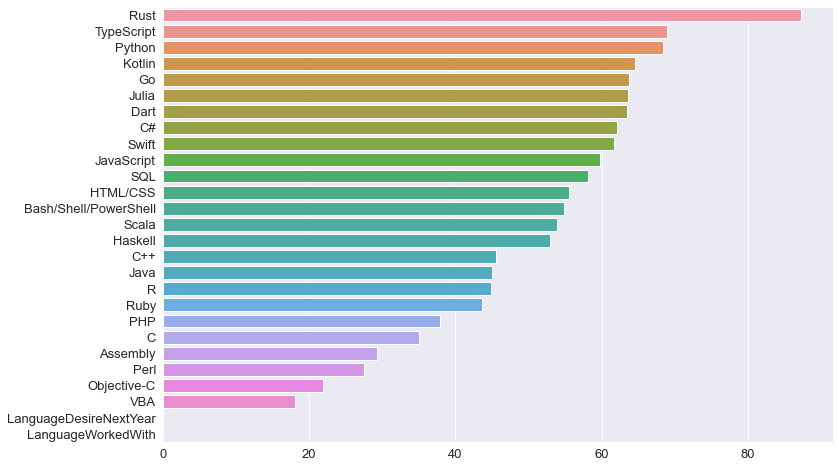

In [86]:
plt.figure(figsize=(12,8));
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index);

In [87]:
dreaded_languages_df = stack_df.LanguageWorkedWith.to_frame()
dreaded_languages_df[cols] = False
dreaded_languages_df.drop(['LanguageWorkedWith'],axis=1)

Java   Ruby  Scala  JavaScript  Python   Rust  HTML/CSS      R    SQL  \
Index                                                                           
0      False  False  False       False   False  False     False  False  False   
1      False  False  False       False   False  False     False  False  False   
2      False  False  False       False   False  False     False  False  False   
3      False  False  False       False   False  False     False  False  False   
4      False  False  False       False   False  False     False  False  False   
...      ...    ...    ...         ...     ...    ...       ...    ...    ...   
45309  False  False  False       False   False  False     False  False  False   
45310  False  False  False       False   False  False     False  False  False   
45311  False  False  False       False   False  False     False  False  False   
45312  False  False  False       False   False  False     False  False  False   
45313  False  False  False       False   False  False     False  False  False   

          Go  ...  Bash/Shell/PowerShell    C++  Julia  Kotlin   Dart    PHP  \
Index         ...                                                              
0      False  ...                  False  False  False   False  False  False   
1      False  ...                  False  False  False   False  False  False   
2      False  ...                  False  False  False   False  False  False   
3      False  ...                  False  False  False   False  False  False   
4      False  ...                  False  False  False   False  False  False   
...      ...  ...                    ...    ...    ...     ...    ...    ...   
45309  False  ...                  False  False  False   False  False  False   
45310  False  ...                  False  False  False   False  False  False   
45311  False  ...                  False  False  False   False  False  False   
45312  False  ...                  False  False  False   False  False  False   
45313  False  ...                  False  False  False   False  False  False   

           C  Assembly  Objective-C    VBA  
Index                                       
0      False     False        False  False  
1      False     False        False  False  
2      False     False        False  False  
3      False     False        False  False  
4      False     False        False  False  
...      ...       ...          ...    ...  
45309  False     False        False  False  
45310  False     False        False  False  
45311  False     False        False  False  
45312  False     False        False  False  
45313  False     False        False  False  

[45314 rows x 25 columns]

In [88]:
for lang in cols:
    for ind, row in coding_languages_df.iterrows():
        if coding_languages_df.loc[ind,lang] == True:
            if LanguageDesireNextYear_df.loc[ind,lang] == False:
                dreaded_languages_df.loc[ind,lang] = True
            else:
                dreaded_languages_df.loc[ind,lang] = False
        else:
            dreaded_languages_df.loc[ind,lang] = False

In [89]:
dreaded_languages_df

LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

        Java   Ruby  Scala  JavaScript  Python   Rust  HTML/CSS      R    SQL  \
Index                                                                           
0      False  False  False       False   False  False     False  False  False   
1      False  False  False       False   False  False      True  False   True   
2      False  False  False       False    True  False     False  False   True   
3      False  False  False        True   False  False      True  False  False   
4      False  False  False       False   False  False     False  False  False   
...      ...    ...    ...         ...     ...    ...       ...    ...    ...   
45309  False  False  False       False   False  False      True   True   True   
45310  False  False  False       False   False  False     False  False  False   
45311  False  False  False       False   False  False     False  False  False   
45312  False  False  False       False   False  False     False  False  False   
45313   True  False  False       False   False  False     False  False  False   

       ...  Bash/Shell/PowerShell    C++  Julia  Kotlin   Dart    PHP      C  \
Index  ...                                                                     
0      ...                  False  False  False   False  False  False  False   
1      ...                  False  False  False   False  False  False  False   
2      ...                  False  False  False   False  False  False  False   
3      ...                  False  False  False   False  False   True  False   
4      ...                  False  False  False   False  False  False  False   
...    ...                    ...    ...    ...     ...    ...    ...    ...   
45309  ...                  False  False  False   False   True  False  False   
45310  ...                  False  False  False   False  False  False  False   
45311  ...                  False  False  False   False  False  False  False   
45312  ...                  False  False  False   False  False  False  False   
45313  ...                  False   True  False   False  False  False   True   

       Assembly  Objective-C    VBA  
Index                                
0         False        False  False  
1         False        False  False  
2         False        False  False  
3         False        False  False  
4         False        False  False  
...         ...          ...    ...  
45309     False        False  False  
45310     False        False  False  
45311     False        False  False  
45312     False        False  False  
45313     False        False  False  

[45314 rows x 26 columns]

In [90]:
dreaded_languages_total = dreaded_languages_df.sum().sort_values(ascending=False)
dreaded_lang_percentage = (dreaded_languages_total * 100 / coding_languages_df.sum()).sort_values(ascending=False)

In [91]:
dreaded_lang_percentage

VBA                      81.890060
Objective-C              78.065242
Perl                     72.446730
Assembly                 70.768055
C                        64.935065
PHP                      62.119888
Ruby                     56.353085
R                        55.079798
Java                     55.043113
C++                      54.390244
Haskell                  47.058824
Scala                    46.111451
Bash/Shell/PowerShell    45.177241
HTML/CSS                 44.531195
SQL                      41.869001
JavaScript               40.172786
Swift                    38.338415
C#                       37.966030
Dart                     36.491228
Julia                    36.363636
Go                       36.318034
Kotlin                   35.440181
Python                   31.568874
TypeScript               31.068209
Rust                     12.779418
dtype: float64

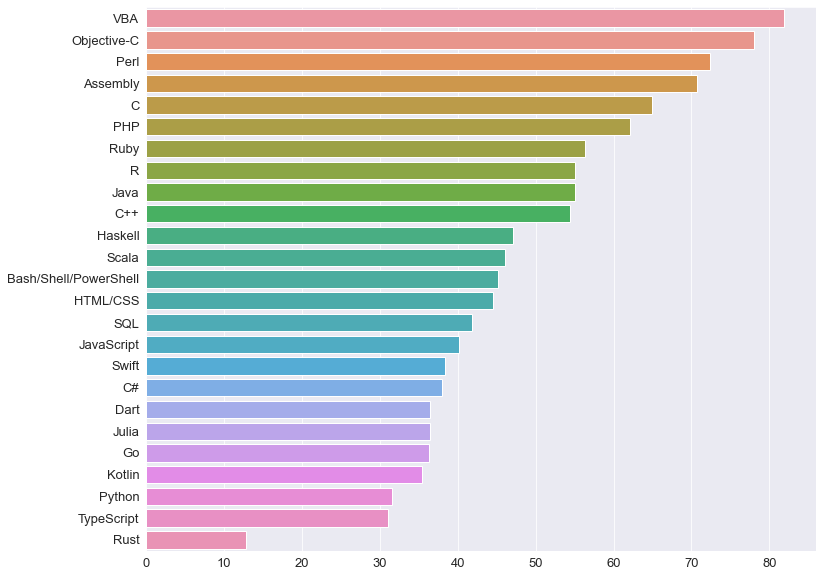

In [92]:
plt.figure(figsize=(12,10))
sns.barplot(x= dreaded_lang_percentage,y=dreaded_lang_percentage.index);

In [93]:
countries_work_df = stack_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
countries_work_df

WorkWeekHrs
Country                                      
Guyana                              60.000000
Haiti                               60.000000
Iraq                                53.125000
Kuwait                              52.166667
Tajikistan                          50.000000
...                                       ...
Saint Lucia                               NaN
Saint Vincent and the Grenadines          NaN
Sierra Leone                              NaN
Solomon Islands                           NaN
Timor-Leste                               NaN

[171 rows x 1 columns]

In [94]:
high_working_hours_df = countries_work_df.loc[stack_df.Country.value_counts() > 250].head(15)

In [95]:
Age_counts_df = stack_df.Age1stCode.value_counts()
Age_counts_df = Age_counts_df.loc[Age_counts_df.index > 10]

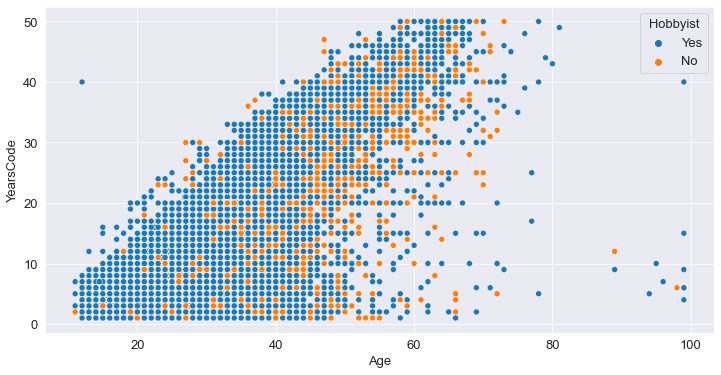

In [96]:
plt.figure(figsize=(12,6));
sns.scatterplot(x=stack_df.Age,y=stack_df.YearsCode,hue=stack_df.Hobbyist);

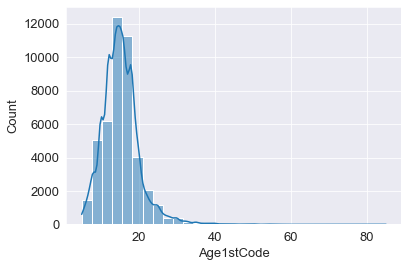

In [97]:
sns.histplot(x=stack_df.Age1stCode,bins=30,kde=True);

In [98]:
merged_df

Employment  \
Index                                                         
0                                                       NaN   
1                                        Employed full-time   
2                                        Employed full-time   
3      Independent contractor, freelancer, or self-employed   
4                                        Employed full-time   
...                                                     ...   
45309                                               Student   
45310                                    Employed full-time   
45311                    Not employed, but looking for work   
45312                                               Retired   
45313                                               Student   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

       HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java     C#  ...  \
Index                                                                   ...   
0         False  False  False   False       False  False  False  False  ...   
1          True   True   True   False       False  False  False  False  ...   
2         False  False   True    True       False  False  False  False  ...   
3          True  False  False   False        True   True  False  False  ...   
4          True  False   True    True        True  False   True  False  ...   
...         ...    ...    ...     ...         ...    ...    ...    ...  ...   
45309      True  False   True    True       False  False   True  False  ...   
45310     False  False   True    True       False  False  False  False  ...   
45311      True  False  False    True        True  False  False  False  ...   
45312      True  False   True    True        True   True  False  False  ...   
45313     False  False  False   False       False  False   True   True  ...   

        Perl  Objective-C  Scala    C++     Go  Haskell   Rust   Dart  Julia  \
Index                                                                          
0      False        False  False  False  False    False  False  False  False   
1      False        False  False  False  False    False  False  False  False   
2      False        False  False  False  False    False  False  False  False   
3      False        False  False  False  False    False  False  False  False   
4      False        False  False  False  False    False  False  False  False   
...      ...          ...    ...    ...    ...      ...    ...    ...    ...   
45309  False        False  False   True  False    False   True   True  False   
45310  False        False  False  False  False    False  False  False  False   
45311  False        False  False  False  False    False  False  False  False   
45312   True        False  False  False  False    False  False  False  False   
45313  False        False  False   True  False    False  False  False  False   

       Assembly  
Index            
0         False  
1         False  
2         False  
3         False  
4         F

In [99]:
coding_languages_df

LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

       HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java     C#  Swift  \
Index                                                                           
0         False  False  False   False       False  False  False  False  False   
1          True   True   True   False       False  False  False  False  False   
2         False  False   True    True       False  False  False  False  False   
3          True  False  False   False        True   True  False  False  False   
4          True  False   True    True        True  False   True  False  False   
...         ...    ...    ...     ...         ...    ...    ...    ...    ...   
45309      True  False   True    True       False  False   True  False  False   
45310     False  False   True    True       False  False  False  False  False   
45311      True  False  False    True        True  False  False  False  False   
45312      True  False   True    True        True   True  False  False  False   
45313     False  False  False   False       False  False   True   True  False   

       ...   Perl  Objective-C  Scala    C++     Go  Haskell   Rust   Dart  \
Index  ...                                                                   
0      ...  False        False  False  False  False    False  False  False   
1      ...  False        False  False  False  False    False  False  False   
2      ...  False        False  False  False  False    False  False  False   
3      ...  False        False  False  False  False    False  False  False   
4      ...  False        False  False  False  False    False  False  False   
...    ...    ...          ...    ...    ...    ...      ...    ...    ...   
45309  ...  False        False  False   True  False    False   True   True   
45310  ...  False        False  False  False  False    False  False  False   
45311  ...  False        False  False  False  False    False  False  False   
45312  ...   True        False  False  False  False    False  False  False   
45313  ...  False        False  False   True  False    False  False  False   

       Julia  Assembly  
Index                   
0      False     False  
1      False     False  
2      False     False  
3      False     False  
4      False     False  
...      ...       ...  
45309  False      True  
45310  False     False  
45311  False     False  
45312  False     False  
45313  False     False  

[45314 rows x 26 columns]

In [100]:
Employment_type_df = stack_df[['EmploymentType','Employment']].copy()
Employment_type_df

EmploymentType                                            Employment
Index                                                                     
0              Other                                                   NaN
1       Professional                                    Employed full-time
2       Professional                                    Employed full-time
3       Professional  Independent contractor, freelancer, or self-employed
4       Professional                                    Employed full-time
...              ...                                                   ...
45309     Enthusiast                                               Student
45310   Professional                                    Employed full-time
45311     Enthusiast                    Not employed, but looking for work
45312          Other                                               Retired
45313     Enthusiast                                               Student

[45314 rows x 2 columns]

In [101]:
merged1_df = pd.concat([Employment_type_df,coding_languages_df],axis=1)

In [102]:
merged1_df

EmploymentType                                            Employment  \
Index                                                                        
0              Other                                                   NaN   
1       Professional                                    Employed full-time   
2       Professional                                    Employed full-time   
3       Professional  Independent contractor, freelancer, or self-employed   
4       Professional                                    Employed full-time   
...              ...                                                   ...   
45309     Enthusiast                                               Student   
45310   Professional                                    Employed full-time   
45311     Enthusiast                    Not employed, but looking for work   
45312          Other                                               Retired   
45313     Enthusiast                                               Student   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

       HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java  ...   Perl  \
Index                                                            ...          
0         False  False  False   False       False  False  False  ...  False   
1          True   True   True   False       False  False  False  ...  False   
2         False  False   True    True       False  False  False  ...  False   
3          True  False  False   False        True   True  False  ...  False   
4          True  False   True    True        True  False   True  ...  False   
...         ...    ...    ...     ...         ...    ...    ...  ...    ...   
45309      True  False   True    True       False  False   True  ...  False   
45310     False  False   True    True       False  False  False  ...  False   
45311      True  False  False    True        True  False  False  ...  False   
45312      True  False   True    True        True   True  False  ...   True   
45313     False  False  False   False       False  False   True  ...  False   

       Objective-C  Scala    C++     Go  Haskell   Rust   Dart  Julia  \
Index                                                                   
0            False  False  False  False    False  False  False  False   
1            False  False  False  False    False  False  False  False   
2            False  False  False  False    False  False  False  False   
3            False  False  False  False    False  False  False  False   
4            False  False  False  False    False  False  False  False   
...            ...    ...    ...    ...      ...    ...    ...    ...   
45309        False  False   True  False    False   True   True  False   
45310        False  False  False  False    False  False  False  False   
45311        False  False  False  False    False  False  False  False   
45312        False  False  False  False    False  False  False  False   
45313        False  False   True  False    Fal

In [103]:
frame_prof = merged1_df[merged1_df.EmploymentType=='Professional']
prof_df = pd.DataFrame(frame_prof)
prof_df.drop(['Employment','EmploymentType'],axis=1,inplace = True)
prof_total_df = prof_df.sum().sort_values(ascending=False)

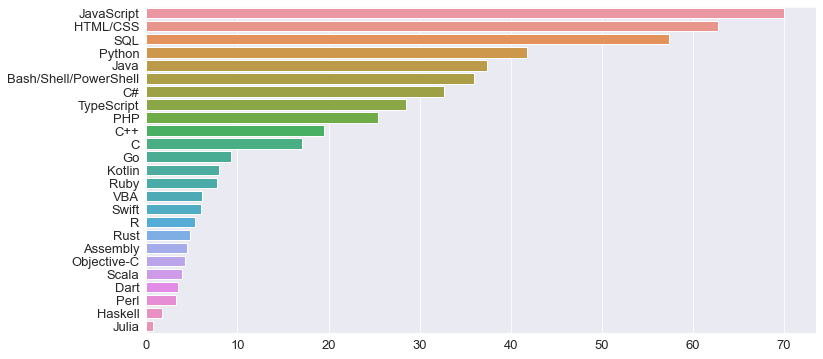

In [104]:
plt.figure(figsize=(12,6));
sns.barplot(x=prof_total_df*100/prof_df.LanguageWorkedWith.count(),y=prof_total_df.index);

In [105]:
frame = merged_df[merged1_df.Employment == 'Student']
students_df = pd.DataFrame(frame).reset_index()
students_df.drop(['Index','Employment'],axis=1,inplace=True)
students_total_df = students_df.sum().sort_values(ascending=False)

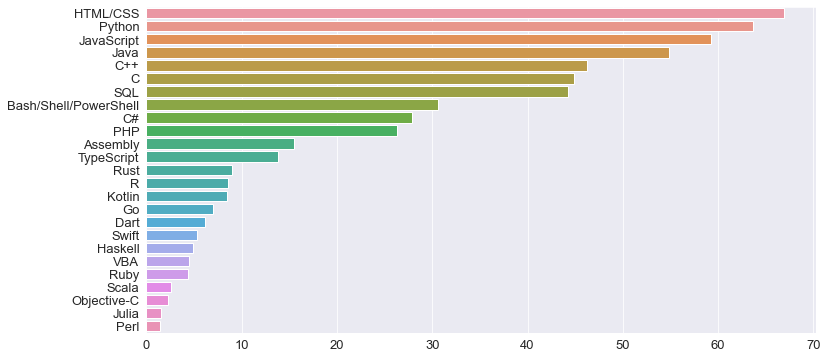

In [106]:
plt.figure(figsize=(12,6));
sns.barplot(x=students_total_df*100/students_df.LanguageWorkedWith.count(),y=students_total_df.index);

In [107]:
devtype_lang_df = pd.concat([devtype_df,coding_languages_df],axis=1)
devtype_lang_df

DevType  \
Index                                                                                                  
0                                                                                                NaN   
1                                                                                                NaN   
2      Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics   
3                                                                              Developer, full-stack   
4                                     Database administrator;Developer, full-stack;Developer, mobile   
...                                                                                              ...   
45309                                                                                            NaN   
45310                                                                            Senior executive/VP   
45311                                                                                            NaN   
45312                                                                                            NaN   
45313                                                                                            NaN   

       Developer, back-end  Developer, desktop or enterprise applications  \
Index                                                                       
0                    False                                          False   
1                    False                                          False   
2                     True                                           True   
3                    False                                          False   
4                    False                                          False   
...                    ...                                            ...   
45309                False                                          False   
45310                False                                          False   
45311                False                                          False   
45312                False                                          False   
45313                False                                          False   

       Developer, game or graphics  Developer, full-stack  \
Index                                                       
0                            False                  False   
1                            False                  False   
2                             True                  False   
3                            False                   True   
4                            False                   True   
...                            ...                    ...   
45309                        False                  False   
45310                        False                  False   
45311                        False                  False   
45312                        False                  False   
45313                        False                  False   

       Database administrator  Developer, mobile  \
Index                                              
0                       False              False   
1                       False              False   
2                       False              False   
3                       False              False   
4                        True               True   
...                       ...                ...   
45309                   False              False   
45310                   False              False   
45311                   False              False   
45312                   False              False   
45313                   False              False   

       Developer, embedded applications or devices  Developer, front-end  \
Index                                                                      
0                                            False                 False   
1                                      

In [108]:
dev_backend_df = devtype_df['Developer, back-end'].copy().to_frame()
dev_backend_lang_df = pd.concat([dev_backend_df,coding_languages_df],axis=1)
dev_backend_lang_df

Developer, back-end  \
Index                        
0                    False   
1                    False   
2                     True   
3                    False   
4                    False   
...                    ...   
45309                False   
45310                False   
45311                False   
45312                False   
45313                False   

                                                          LanguageWorkedWith  \
Index                                                                          
0                                                                        NaN   
1                                                          HTML/CSS;Ruby;SQL   
2                                                                 Python;SQL   
3                                                    HTML/CSS;JavaScript;PHP   
4                                        HTML/CSS;Java;JavaScript;Python;SQL   
...                                                                      ...   
45309  Assembly;C;C++;Dart;HTML/CSS;Java;Kotlin;Python;R;Rust;SQL;TypeScript   
45310                                                             Python;SQL   
45311                                             HTML/CSS;JavaScript;Python   
45312          Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl;PHP;Python;SQL   
45313                                                          C;C#;C++;Java   

       HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java     C#  ...  \
Index                                                                   ...   
0         False  False  False   False       False  False  False  False  ...   
1          True   True   True   False       False  False  False  False  ...   
2         False  False   True    True       False  False  False  False  ...   
3          True  False  False   False        True   True  False  False  ...   
4          True  False   True    True        True  False   True  False  ...   
...         ...    ...    ...     ...         ...    ...    ...    ...  ...   
45309      True  False   True    True       False  False   True  False  ...   
45310     False  False   True    True       False  False  False  False  ...   
45311      True  False  False    True        True  False  False  False  ...   
45312      True  False   True    True        True   True  False  False  ...   
45313     False  False  False   False       False  False   True   True  ...   

        Perl  Objective-C  Scala    C++     Go  Haskell   Rust   Dart  Julia  \
Index                                                                          
0      False        False  False  False  False    False  False  False  False   
1      False        False  False  False  False    False  False  False  False   
2      False        False  False  False  False    False  False  False  False   
3      False        False  False  False  False    False  False  False  False   
4      False        False  False  False  False    False  False  False  False   
...      ...          ...    ...    ...    ...      ...    ...    ...    ...   
45309  False        False  False   True  False    False   True   True  False   
45310  False        False  False  False  False    False  False  False  False   
45311  False        False  False  False  False    False  False  False  False   
45312   True        False  False  False  False    False  False  False  False   
45313  False        False  False   True  False    False  False  False  False   

       Assembly  
Index            
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
45309      True  
45310     False  
45311     False  
45312     False  
45313     False  

[45314 rows x 27 columns]

In [109]:
non_backend_df = dev_backend_lang_df.copy()
for ind, row in non_backend_df.iterrows():
    if non_backend_df.loc[ind,'Developer, back-end'] == True:
        non_backend_df.drop([ind],inplace=True)

In [110]:
non_backend_df.drop(['LanguageWorkedWith','Developer, back-end'],axis=1)

HTML/CSS   Ruby    SQL  Python  JavaScript    PHP   Java     C#  Swift  \
Index                                                                           
0         False  False  False   False       False  False  False  False  False   
1          True   True   True   False       False  False  False  False  False   
3          True  False  False   False        True   True  False  False  False   
4          True  False   True    True        True  False   True  False  False   
6          True  False  False   False        True  False  False  False  False   
...         ...    ...    ...     ...         ...    ...    ...    ...    ...   
45309      True  False   True    True       False  False   True  False  False   
45310     False  False   True    True       False  False  False  False  False   
45311      True  False  False    True        True  False  False  False  False   
45312      True  False   True    True        True   True  False  False  False   
45313     False  False  False   False       False  False   True   True  False   

           C  ...   Perl  Objective-C  Scala    C++     Go  Haskell   Rust  \
Index         ...                                                            
0      False  ...  False        False  False  False  False    False  False   
1      False  ...  False        False  False  False  False    False  False   
3      False  ...  False        False  False  False  False    False  False   
4      False  ...  False        False  False  False  False    False  False   
6      False  ...  False        False  False  False  False    False  False   
...      ...  ...    ...          ...    ...    ...    ...      ...    ...   
45309   True  ...  False        False  False   True  False    False   True   
45310  False  ...  False        False  False  False  False    False  False   
45311  False  ...  False        False  False  False  False    False  False   
45312  False  ...   True        False  False  False  False    False  False   
45313   True  ...  False        False  False   True  False    False  False   

        Dart  Julia  Assembly  
Index                          
0      False  False     False  
1      False  False     False  
3      False  False     False  
4      False  False     False  
6      False  False     False  
...      ...    ...       ...  
45309   True  False      True  
45310  False  False     False  
45311  False  False     False  
45312  False  False     False  
45313  False  False     False  

[23584 rows x 25 columns]

In [111]:
non_backend_total_df = non_backend_df.sum().sort_values(ascending=False)

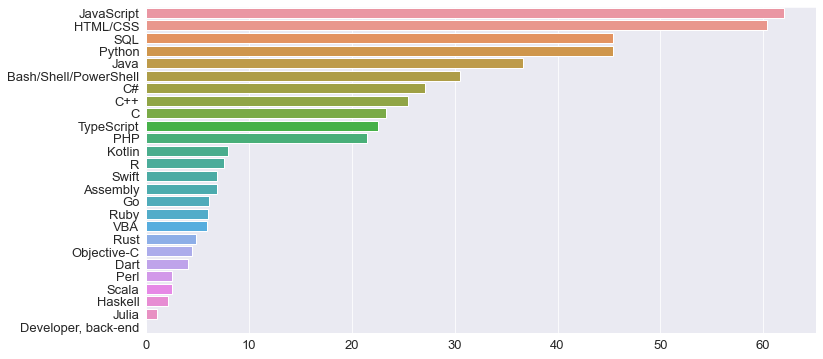

In [112]:
#Famous languages among non Delevelopers, back-end
plt.figure(figsize=(12,6));
total_number = non_backend_df['Developer, back-end'].count()
sns.barplot(x=non_backend_total_df*100/total_number,y=non_backend_total_df.index);

In [113]:
devtype_df

DevType  \
Index                                                                                                  
0                                                                                                NaN   
1                                                                                                NaN   
2      Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics   
3                                                                              Developer, full-stack   
4                                     Database administrator;Developer, full-stack;Developer, mobile   
...                                                                                              ...   
45309                                                                                            NaN   
45310                                                                            Senior executive/VP   
45311                                                                                            NaN   
45312                                                                                            NaN   
45313                                                                                            NaN   

       Developer, back-end  Developer, desktop or enterprise applications  \
Index                                                                       
0                    False                                          False   
1                    False                                          False   
2                     True                                           True   
3                    False                                          False   
4                    False                                          False   
...                    ...                                            ...   
45309                False                                          False   
45310                False                                          False   
45311                False                                          False   
45312                False                                          False   
45313                False                                          False   

       Developer, game or graphics  Developer, full-stack  \
Index                                                       
0                            False                  False   
1                            False                  False   
2                             True                  False   
3                            False                   True   
4                            False                   True   
...                            ...                    ...   
45309                        False                  False   
45310                        False                  False   
45311                        False                  False   
45312                        False                  False   
45313                        False                  False   

       Database administrator  Developer, mobile  \
Index                                              
0                       False              False   
1                       False              False   
2                       False              False   
3                       False              False   
4                        True               True   
...                       ...                ...   
45309                   False              False   
45310                   False              False   
45311                   False              False   
45312                   False              False   
45313                   False              False   

       Developer, embedded applications or devices  Developer, front-end  \
Index                                                                      
0                                            False                 False   
1                                      

In [114]:
devtype_df.columns

Index(['DevType', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, game or graphics', 'Developer, full-stack',
       'Database administrator', 'Developer, mobile',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Designer', 'Developer, QA or test', 'DevOps specialist', 'Educator',
       'Data or business analyst',
       'Data scientist or machine learning specialist', 'Engineering manager',
       'Product manager', 'Engineer, data', 'Scientist', 'Academic researcher',
       'Senior executive/VP', 'System administrator',
       'Engineer, site reliability', 'Marketing or sales professional'],
      dtype='object')

In [115]:
Age_df = stack_df['Age'].to_frame()

In [118]:
age_codlang_df = pd.concat([Age_df,coding_languages_df],axis=1)

In [126]:
middle_age_df = age_codlang_df[age_codlang_df.Age > 35].reset_index()
middle_age_total_df = middle_age_df.drop(['Index','LanguageWorkedWith','Age'],axis=1).sum().sort_values(ascending=False)
middle_age_total_df

JavaScript               7238
SQL                      6604
HTML/CSS                 6528
Bash/Shell/PowerShell    4485
Python                   4208
C#                       3924
Java                     3610
PHP                      2539
TypeScript               2517
C++                      2112
C                        1933
VBA                       974
Go                        970
Ruby                      914
Perl                      716
Swift                     639
Kotlin                    619
R                         616
Assembly                  568
Objective-C               522
Rust                      437
Scala                     394
Dart                      242
Haskell                   151
Julia                      94
dtype: int64

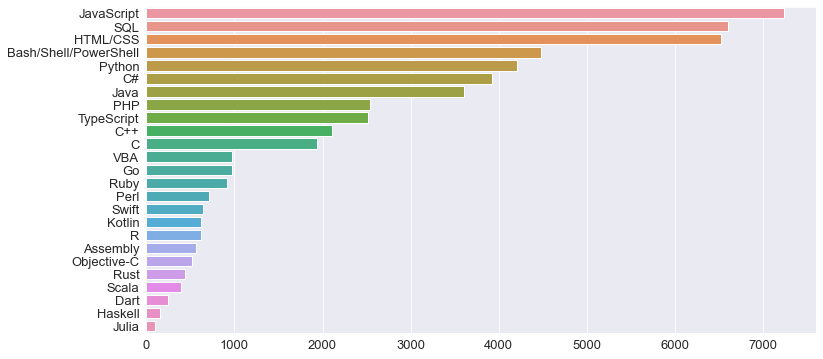

In [128]:
plt.figure(figsize=(12,6));
sns.barplot(x=middle_age_total_df,y=middle_age_total_df.index);

In [135]:
country_df = stack_df['Country'].to_frame()
lang_country_df = pd.concat([country_df,coding_languages_df],axis=1)
Iran_codinglang_df = lang_country_df[lang_country_df.Country=='Iran'].reset_index().drop(['Index','Country'],axis=1)
Iran_total_df = Iran_codinglang_df.drop(['LanguageWorkedWith'],axis=1).sum().sort_values(ascending=False)

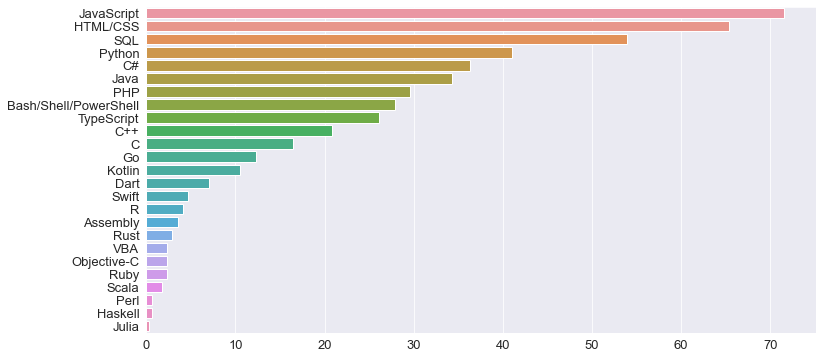

In [139]:
plt.figure(figsize=(12,6));
sns.barplot(x=Iran_total_df*100/Iran_codinglang_df.LanguageWorkedWith.count(),y=Iran_total_df.index);

In [141]:
countries_df = pd.read_csv('/Users/parastooagharezaei/Downloads/countries.csv')
countries_df

location continent  population  life_expectancy  \
0       Afghanistan      Asia  38928341.0            64.83   
1           Albania    Europe   2877800.0            78.57   
2           Algeria    Africa  43851043.0            76.88   
3           Andorra    Europe     77265.0            83.73   
4            Angola    Africa  32866268.0            61.15   
..              ...       ...         ...              ...   
205         Vietnam      Asia  97338583.0            75.40   
206  Western Sahara    Africa    597330.0            70.26   
207           Yemen      Asia  29825968.0            66.12   
208          Zambia    Africa  18383956.0            63.89   
209        Zimbabwe    Africa  14862927.0            61.49   

     hospital_beds_per_thousand  gdp_per_capita  
0                          0.50        1803.987  
1                          2.89       11803.431  
2                          1.90       13913.839  
3                           NaN             NaN  
4                           NaN        5819.495  
..                          ...             ...  
205                        2.60        6171.884  
206                         NaN             NaN  
207                        0.70        1479.147  
208                        2.00        3689.251  
209                        1.70        1899.775  

[210 rows x 6 columns]

In [156]:
continent_list = list(countries_df.continent.unique())
continent_list

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [160]:
Asia_countries_list = list(countries_df[countries_df.continent=='Asia'].location.unique())
Europe_countries_list = list(countries_df[countries_df.continent=='Europe'].location.unique())
Africa_countries_list = list(countries_df[countries_df.continent=='Europe'].location.unique())
North_America_countries_list = list(countries_df[countries_df.continent=='North America'].location.unique())
Oceania_countries_list = list(countries_df[countries_df.continent=='Oceania'].location.unique())

In [147]:
work_country_cols =['WorkWeekHrs','Country'] 
workhrs_country_series = stack_df[['WorkWeekHrs','Country']]
workhrs_country_df = pd.DataFrame(workhrs_country_series)
workhrs_country_df

WorkWeekHrs         Country
Index                             
0             40.0         Albania
1              NaN   United States
2             39.0   United States
3             50.0         Tunisia
4             36.0  United Kingdom
...            ...             ...
45309          NaN           Spain
45310          NaN          Brazil
45311          NaN          Israel
45312          NaN          France
45313          NaN          Canada

[45314 rows x 2 columns]

In [161]:
for ind, row in workhrs_country_df.iterrows():
    if workhrs_country_df.loc[ind,'Country'] in Asia_countries_list:
        workhrs_country_df.loc[ind,'Continent'] = 'Asia'
    elif workhrs_country_df.loc[ind,'Country'] in Europe_countries_list:
        workhrs_country_df.loc[ind,'Continent'] = 'Europe'
    elif workhrs_country_df.loc[ind,'Country'] in Africa_countries_list:
        workhrs_country_df.loc[ind,'Continent'] = 'Africa'
    elif workhrs_country_df.loc[ind,'Country'] in North_America_countries_list:
        workhrs_country_df.loc[ind,'Continent'] = 'North_America'
    else:
        workhrs_country_df.loc[ind,'Continent'] = 'Oceania'

In [162]:
workhrs_country_df

WorkWeekHrs         Country      Continent
Index                                            
0             40.0         Albania         Europe
1              NaN   United States  North_America
2             39.0   United States  North_America
3             50.0         Tunisia        Oceania
4             36.0  United Kingdom         Europe
...            ...             ...            ...
45309          NaN           Spain         Europe
45310          NaN          Brazil        Oceania
45311          NaN          Israel           Asia
45312          NaN          France         Europe
45313          NaN          Canada  North_America

[45314 rows x 3 columns]

In [163]:
workhrs_country_df.groupby('Continent')['WorkWeekHrs'].mean()

Continent
Asia             40.674053
Europe           39.178130
North_America    41.417932
Oceania          39.198412
Name: WorkWeekHrs, dtype: float64

In [165]:
devtype_workwkhrs_df = pd.concat([devtype_df,workhrs_country_df],axis=1)
devtype_workwkhrs_df

DevType  \
Index                                                                                                  
0                                                                                                NaN   
1                                                                                                NaN   
2      Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics   
3                                                                              Developer, full-stack   
4                                     Database administrator;Developer, full-stack;Developer, mobile   
...                                                                                              ...   
45309                                                                                            NaN   
45310                                                                            Senior executive/VP   
45311                                                                                            NaN   
45312                                                                                            NaN   
45313                                                                                            NaN   

       Developer, back-end  Developer, desktop or enterprise applications  \
Index                                                                       
0                    False                                          False   
1                    False                                          False   
2                     True                                           True   
3                    False                                          False   
4                    False                                          False   
...                    ...                                            ...   
45309                False                                          False   
45310                False                                          False   
45311                False                                          False   
45312                False                                          False   
45313                False                                          False   

       Developer, game or graphics  Developer, full-stack  \
Index                                                       
0                            False                  False   
1                            False                  False   
2                             True                  False   
3                            False                   True   
4                            False                   True   
...                            ...                    ...   
45309                        False                  False   
45310                        False                  False   
45311                        False                  False   
45312                        False                  False   
45313                        False                  False   

       Database administrator  Developer, mobile  \
Index                                              
0                       False              False   
1                       False              False   
2                       False              False   
3                       False              False   
4                        True               True   
...                       ...                ...   
45309                   False              False   
45310                   False              False   
45311                   False              False   
45312                   False              False   
45313                   False              False   

       Developer, embedded applications or devices  Developer, front-end  \
Index                                                                      
0                                            False                 False   
1                                      

In [169]:
test0 = devtype_workwkhrs_df.groupby('Developer, back-end')['WorkWeekHrs'].mean()
test1=
dev_backend_mean = pd.DataFrame(test3)
Developerback-end_mean

WorkWeekHrs
Developer, back-end             
False                  40.070434
True                   40.052669

In [172]:
stack_df.groupby('Employment')['WorkWeekHrs'].mean()

Employment
Employed full-time                                      40.470005
Employed part-time                                      28.655072
Independent contractor, freelancer, or self-employed    40.107304
Not employed, and not looking for work                        NaN
Not employed, but looking for work                            NaN
Retired                                                       NaN
Student                                                       NaN
Name: WorkWeekHrs, dtype: float64